#1. Basic Dataset Statistics

In [ ]:
# Display first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


pair_ID                                         sentence_A  \
0        1  A group of kids is playing in a yard and an ol...   
1        2  A group of children is playing in the house an...   
2        3  The young boys are playing outdoors and the ma...   
3        4  The young boys are playing outdoors and the ma...   
4        5  The kids are playing outdoors near a man with ...   

                                          sentence_B    entailment_AB  \
0  A group of boys in a yard is playing and a man...      A_neutral_B   
1  A group of kids is playing in a yard and an ol...  A_contradicts_B   
2  The kids are playing outdoors near a man with ...      A_entails_B   
3  There is no boy playing outdoors and there is ...  A_contradicts_B   
4  A group of kids is playing in a yard and an ol...      A_neutral_B   

     entailment_BA  
0      B_neutral_A  
1      B_neutral_A  
2      B_entails_A  
3  B_contradicts_A  
4      B_neutral_A

##Checking for missing Values

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
df.isnull().sum()


Missing values in each column:


pair_ID          0
sentence_A       0
sentence_B       0
entailment_AB    0
entailment_BA    0
dtype: int64

##Distribution of entailment classes AB

In [ ]:

print("\nDistribution of entailment_AB classes:")
ab_counts = df['entailment_AB'].value_counts()
print(ab_counts)
df['entailment_AB'].value_counts(normalize=True).round(3)


Distribution of entailment_AB classes:
entailment_AB
A_neutral_B        5268
A_entails_B        2821
A_contradicts_B    1751
Name: count, dtype: int64


entailment_AB
A_neutral_B        0.535
A_entails_B        0.287
A_contradicts_B    0.178
Name: proportion, dtype: float64

## Distribution of entailment classes BA

In [ ]:
print("\nDistribution of entailment_BA classes:")
ba_counts = df['entailment_BA'].value_counts()
print(ba_counts)
df['entailment_BA'].value_counts(normalize=True).round(3)


Distribution of entailment_BA classes:
entailment_BA
B_neutral_A        6832
B_contradicts_A    1708
B_entails_A        1300
Name: count, dtype: int64


entailment_BA
B_neutral_A        0.694
B_contradicts_A    0.174
B_entails_A        0.132
Name: proportion, dtype: float64

## Visualize distribution of entailment classes

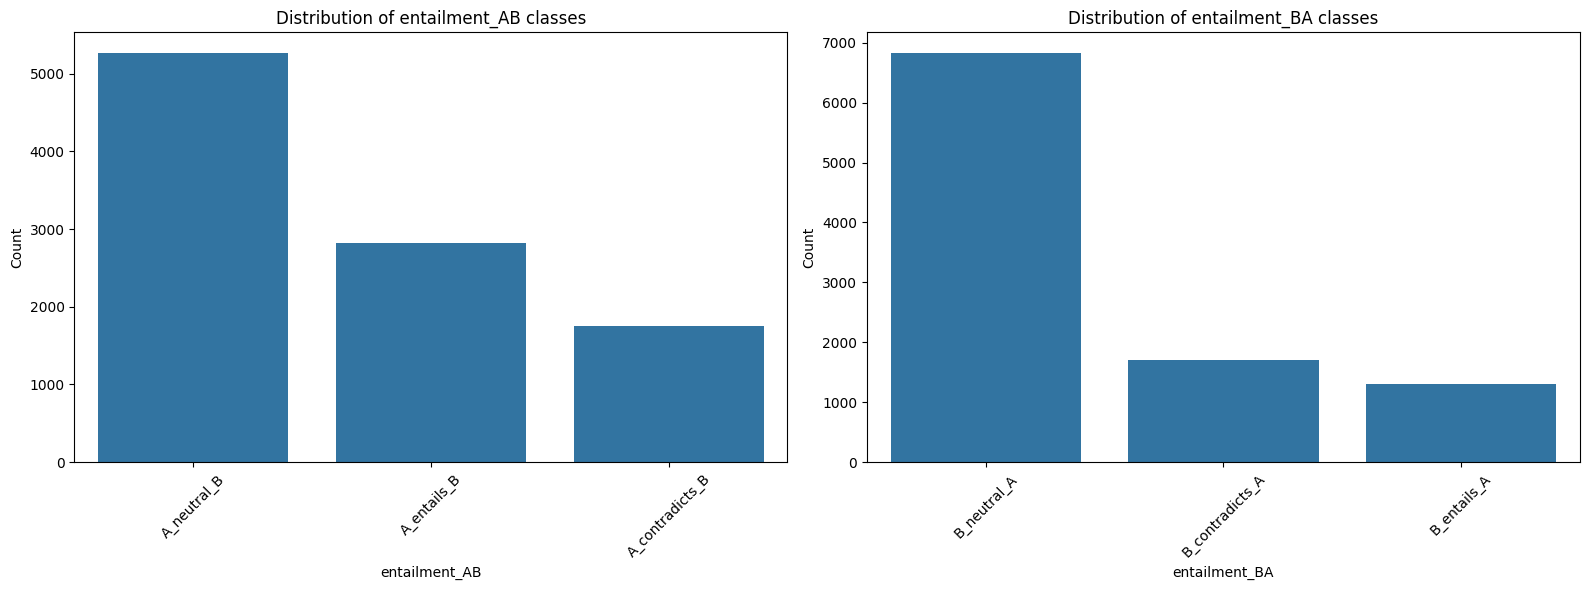

In [ ]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=ab_counts.index, y=ab_counts.values)
plt.title('Distribution of entailment_AB classes')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=ba_counts.index, y=ba_counts.values)
plt.title('Distribution of entailment_BA classes')
plt.xticks(rotation=45)
plt.ylabel('Count')

plt.tight_layout()
plt.show()

##Distribution of seven-category classification

In [ ]:
df['seven_category'] = df.apply(lambda row:
                                f"{row['entailment_AB']}_{row['entailment_BA']}", axis=1)

print("\nDistribution of seven-category classification:")
seven_counts = df['seven_category'].value_counts()
print(seven_counts)
df['seven_category'].value_counts(normalize=True).round(3)


Distribution of seven-category classification:
seven_category
A_neutral_B_B_neutral_A            4992
A_entails_B_B_neutral_A            1513
A_contradicts_B_B_contradicts_A    1424
A_entails_B_B_entails_A            1300
A_contradicts_B_B_neutral_A         327
A_neutral_B_B_contradicts_A         276
A_entails_B_B_contradicts_A           8
Name: count, dtype: int64


seven_category
A_neutral_B_B_neutral_A            0.507
A_entails_B_B_neutral_A            0.154
A_contradicts_B_B_contradicts_A    0.145
A_entails_B_B_entails_A            0.132
A_contradicts_B_B_neutral_A        0.033
A_neutral_B_B_contradicts_A        0.028
A_entails_B_B_contradicts_A        0.001
Name: proportion, dtype: float64

##Visualize seven-category distribution

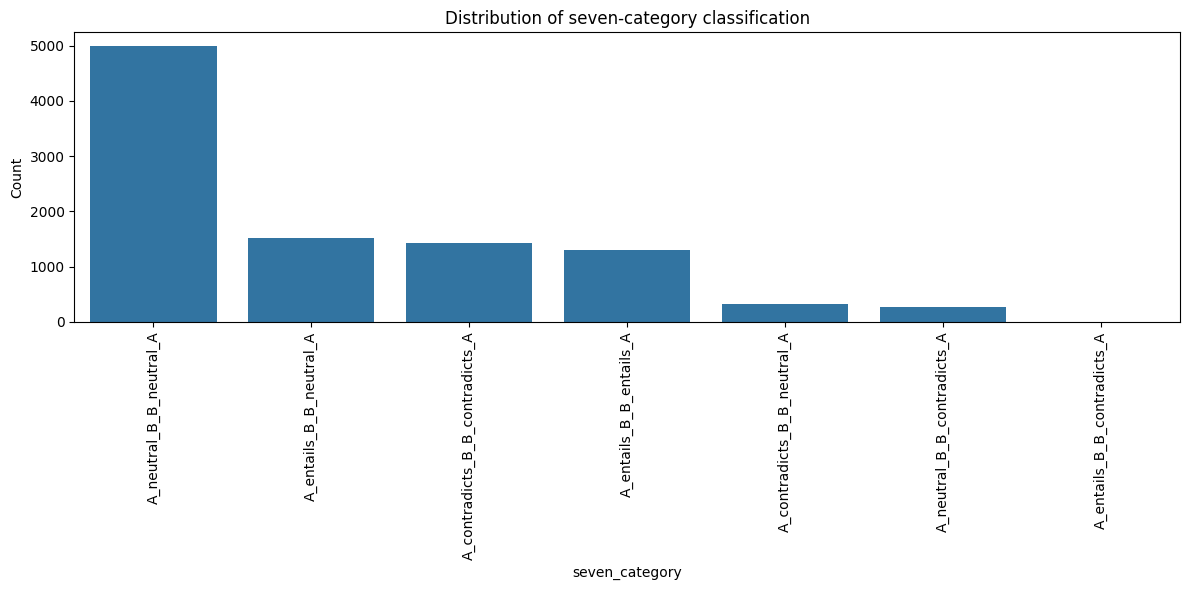

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x=seven_counts.index, y=seven_counts.values)
plt.title('Distribution of seven-category classification')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2.Sentence-Level Analysis

In [ ]:
# Add character and word count columns
df['sentence_A_char_count'] = df['sentence_A'].apply(len)
df['sentence_B_char_count'] = df['sentence_B'].apply(len)

df['sentence_A_word_count'] = df['sentence_A'].apply(lambda x: len(word_tokenize(x)))
df['sentence_B_word_count'] = df['sentence_B'].apply(lambda x: len(word_tokenize(x)))

# Descriptive statistics for sentence lengths
print("Descriptive statistics for sentence lengths:")
length_stats = df[['sentence_A_char_count', 'sentence_B_char_count',
                  'sentence_A_word_count', 'sentence_B_word_count']].describe()
length_stats

Descriptive statistics for sentence lengths:


sentence_A_char_count  sentence_B_char_count  sentence_A_word_count  \
count            9840.000000            9840.000000            9840.000000   
mean               46.729472              45.757825               9.805183   
std                18.407124              18.304646               3.776529   
min                15.000000              14.000000               3.000000   
25%                33.000000              32.000000               7.000000   
50%                43.000000              42.000000               9.000000   
75%                57.000000              56.000000              12.000000   
max               151.000000             151.000000              30.000000   

       sentence_B_word_count  
count            9840.000000  
mean                9.601321  
std                 3.746394  
min                 3.000000  
25%                 7.000000  
50%                 9.000000  
75%                12.000000  
max                36.000000

##Visualize sentence length distributions

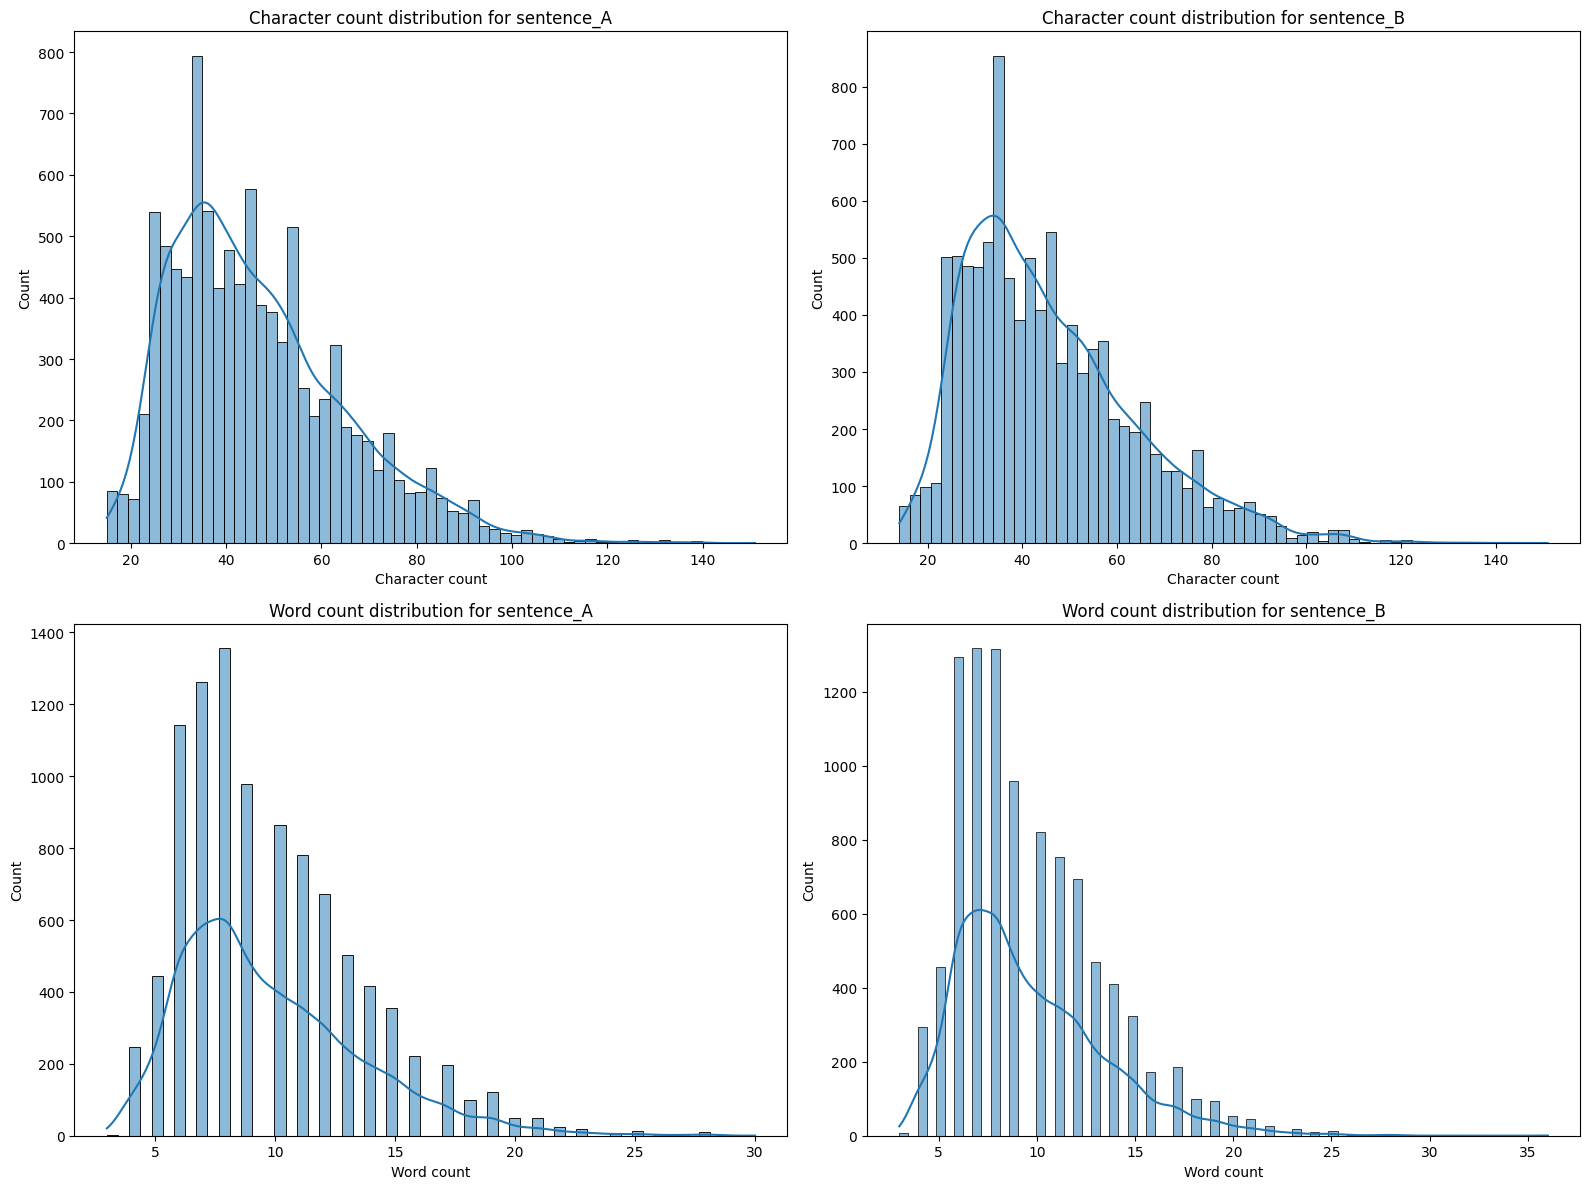

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.histplot(df['sentence_A_char_count'], kde=True)
plt.title('Character count distribution for sentence_A')
plt.xlabel('Character count')

plt.subplot(2, 2, 2)
sns.histplot(df['sentence_B_char_count'], kde=True)
plt.title('Character count distribution for sentence_B')
plt.xlabel('Character count')

plt.subplot(2, 2, 3)
sns.histplot(df['sentence_A_word_count'], kde=True)
plt.title('Word count distribution for sentence_A')
plt.xlabel('Word count')

plt.subplot(2, 2, 4)
sns.histplot(df['sentence_B_word_count'], kde=True)
plt.title('Word count distribution for sentence_B')
plt.xlabel('Word count')

plt.tight_layout()
plt.show()

## Compare sentence length distributions across entailment types

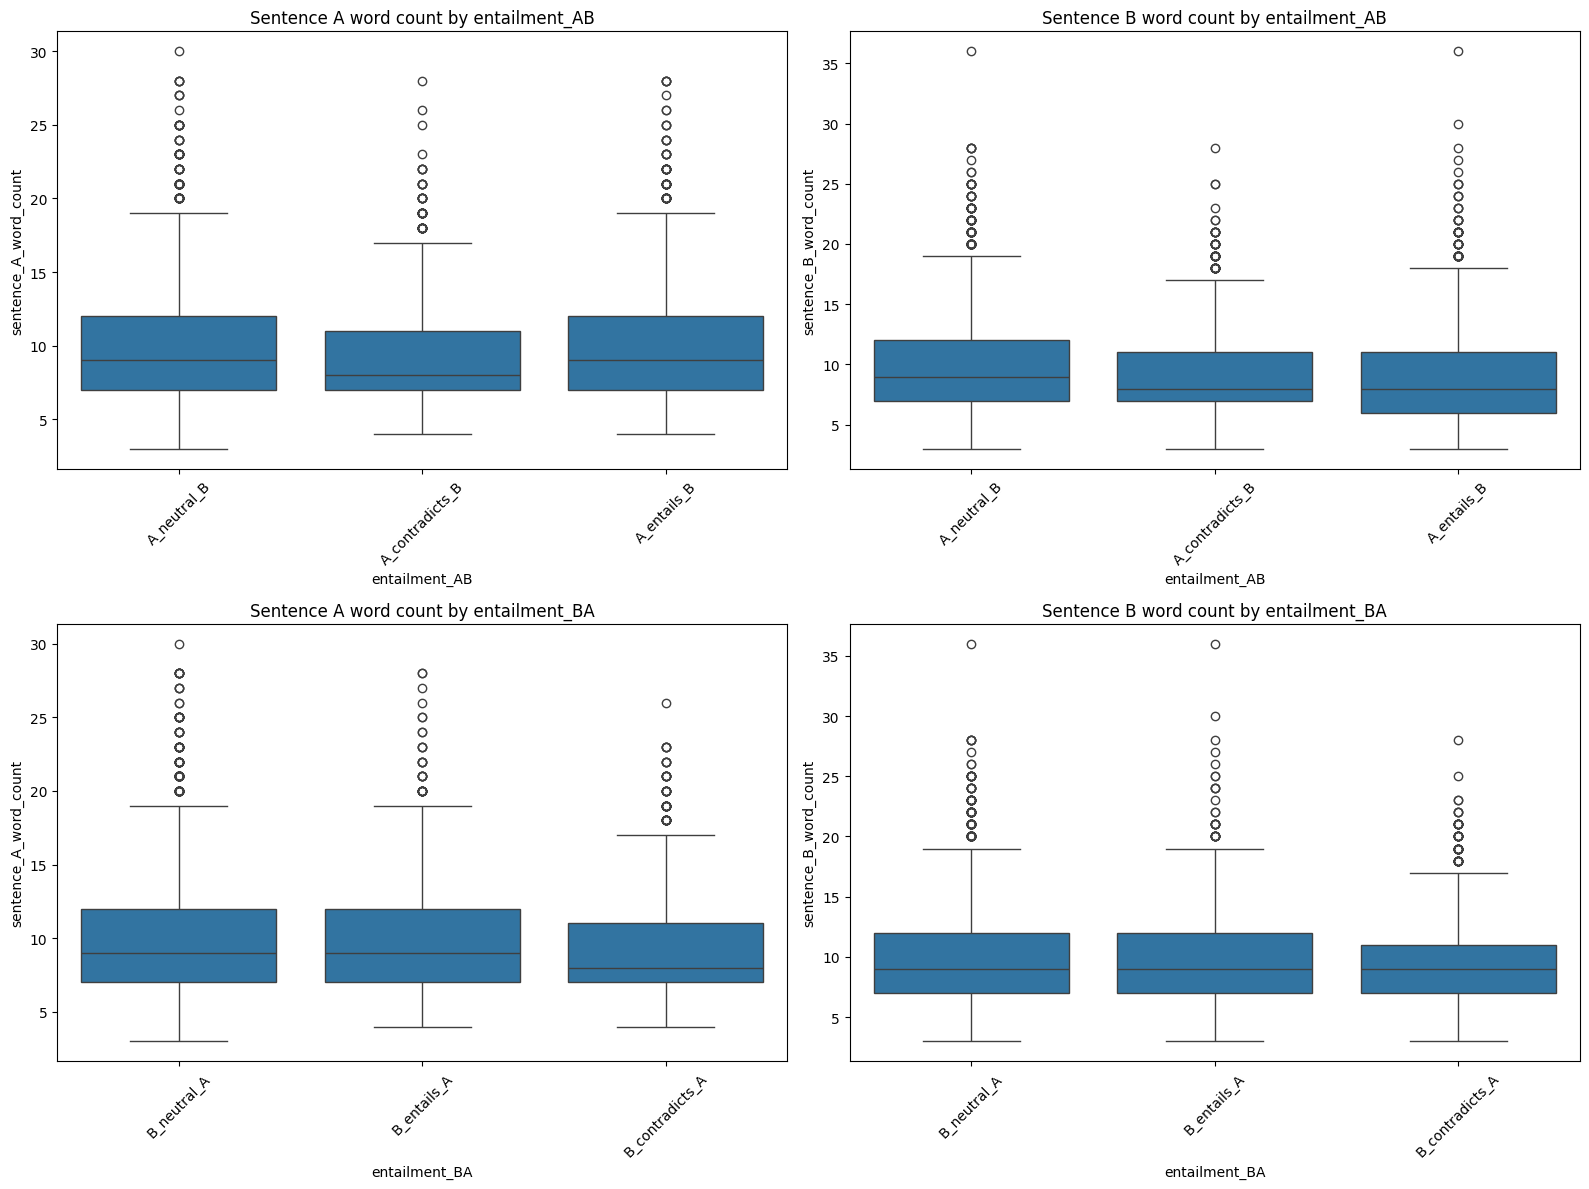

In [ ]:
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x='entailment_AB', y='sentence_A_word_count', data=df)
plt.title('Sentence A word count by entailment_AB')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.boxplot(x='entailment_AB', y='sentence_B_word_count', data=df)
plt.title('Sentence B word count by entailment_AB')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
sns.boxplot(x='entailment_BA', y='sentence_A_word_count', data=df)
plt.title('Sentence A word count by entailment_BA')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.boxplot(x='entailment_BA', y='sentence_B_word_count', data=df)
plt.title('Sentence B word count by entailment_BA')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## WordCloud

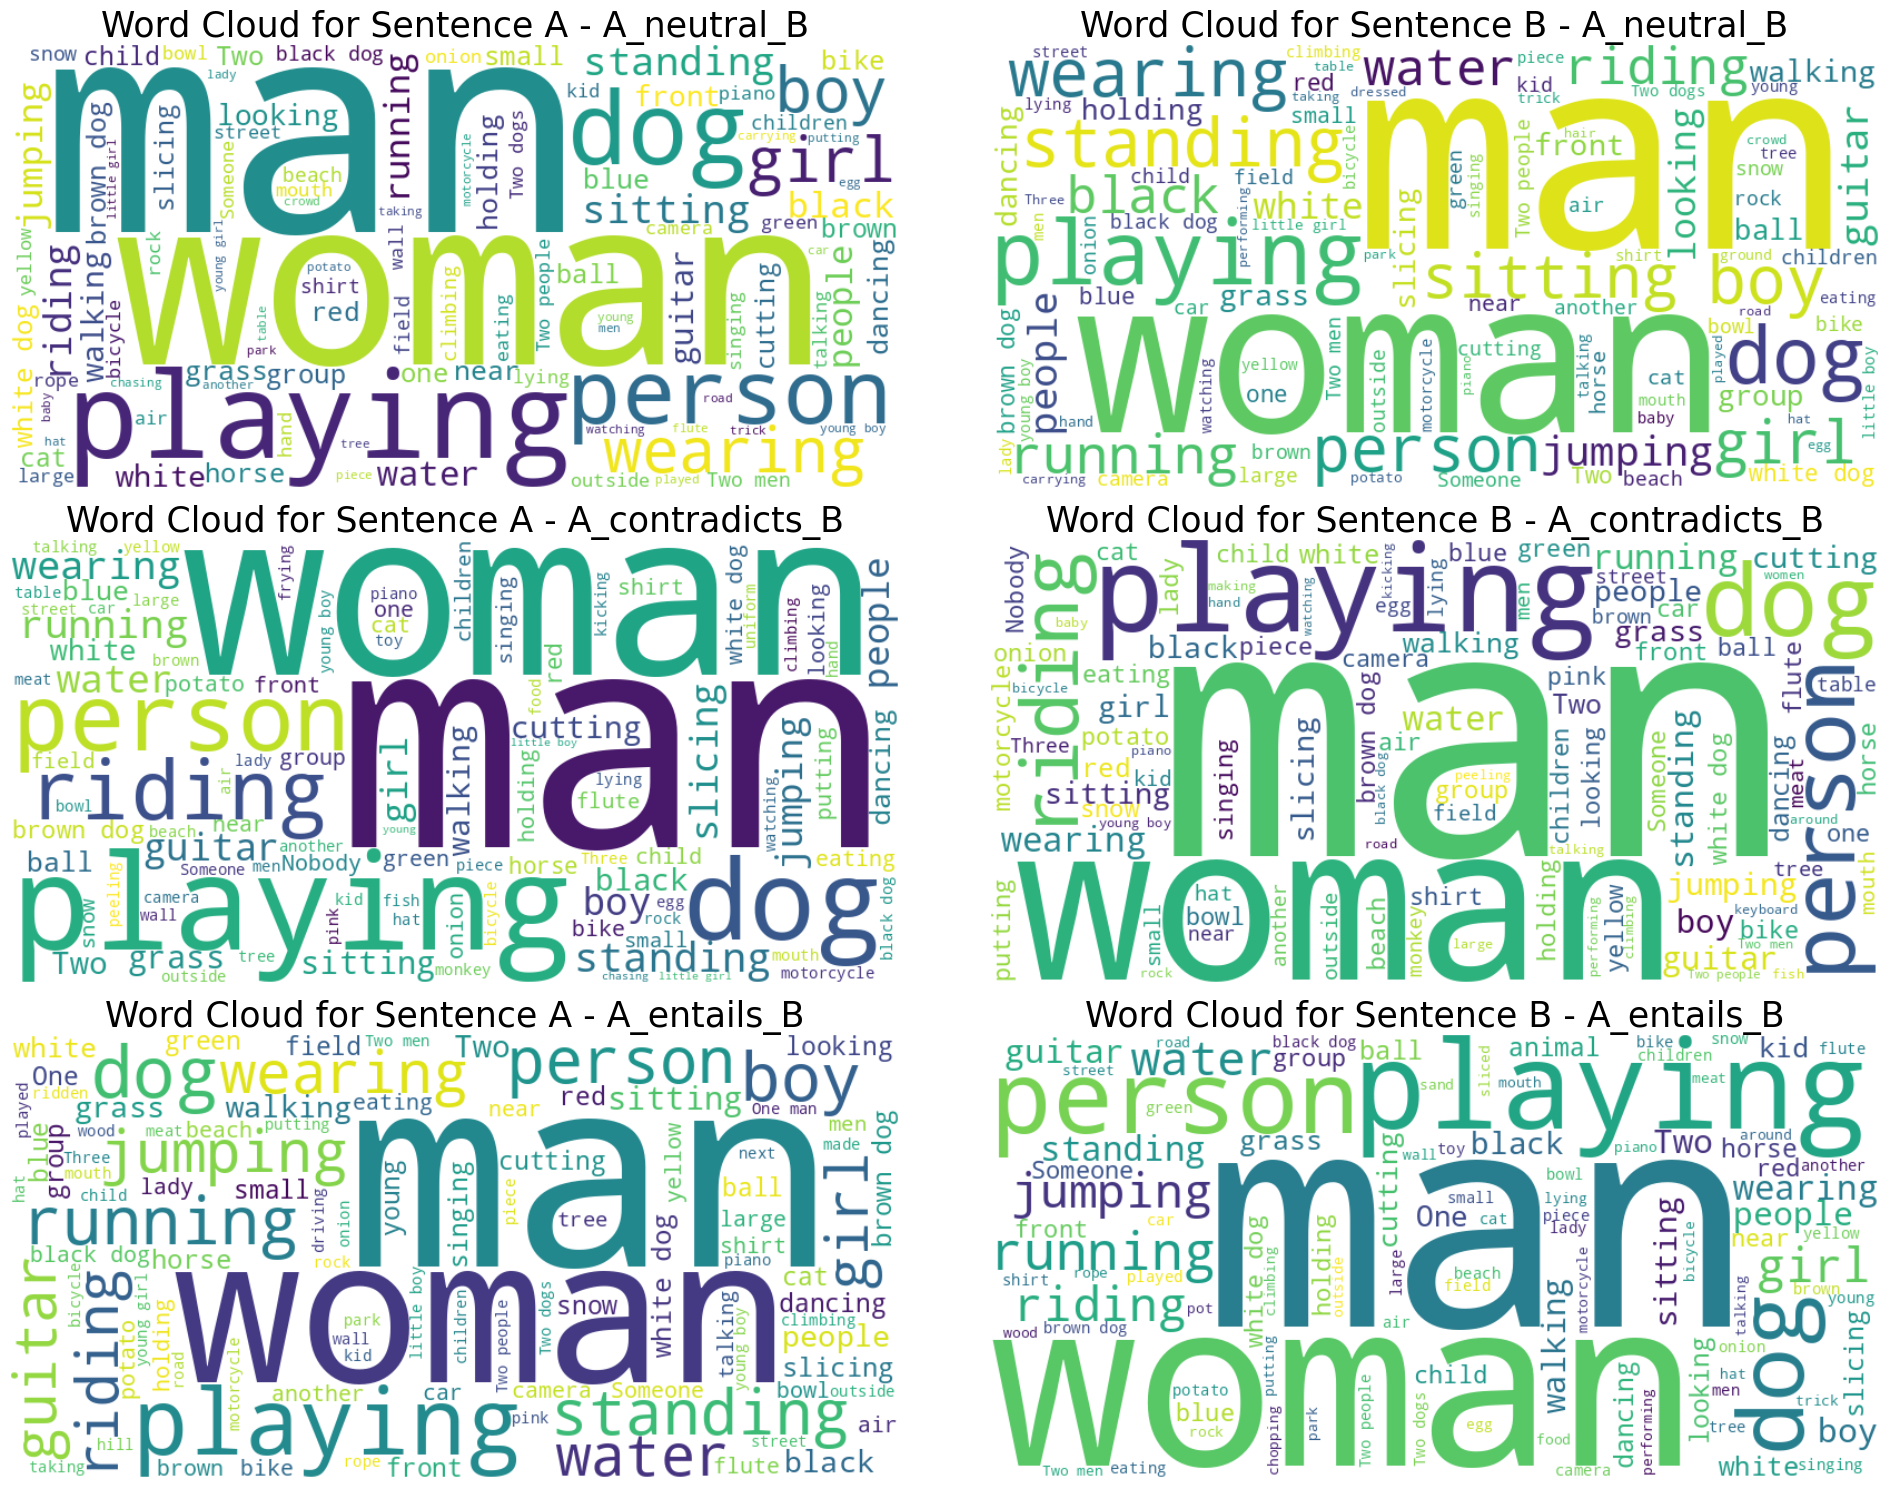

In [ ]:
stop_words = set(stopwords.words('english'))

def get_word_freq(texts):
    all_words = []
    for text in texts:
        words = [word.lower() for word in word_tokenize(text)
                if word.lower() not in stop_words and word not in string.punctuation]
        all_words.extend(words)
    return Counter(all_words)

# Generate word clouds for each entailment type
entailment_types = df['entailment_AB'].unique()

plt.figure(figsize=(20, 15))
for i, entailment in enumerate(entailment_types):
    subset = df[df['entailment_AB'] == entailment]
    text = ' '.join(subset['sentence_A'])

    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=100,
                          stopwords=stop_words).generate(text)

    plt.subplot(len(entailment_types), 2, 2*i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentence A - {entailment}',fontsize=25)
    plt.axis("off")

    text = ' '.join(subset['sentence_B'])
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=100,
                          stopwords=stop_words).generate(text)

    plt.subplot(len(entailment_types), 2, 2*i+2)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Sentence B - {entailment}',fontsize=25)
    plt.axis("off")
entailment_types
plt.tight_layout()
plt.show()

Seven-category distribution (normalized):
seven_category
A_entails_B_B_contradicts_A        0.000813
A_neutral_B_B_contradicts_A        0.028049
A_contradicts_B_B_neutral_A        0.033232
A_entails_B_B_entails_A            0.132114
A_contradicts_B_B_contradicts_A    0.144715
A_entails_B_B_neutral_A            0.153760
A_neutral_B_B_neutral_A            0.507317
Name: proportion, dtype: float64


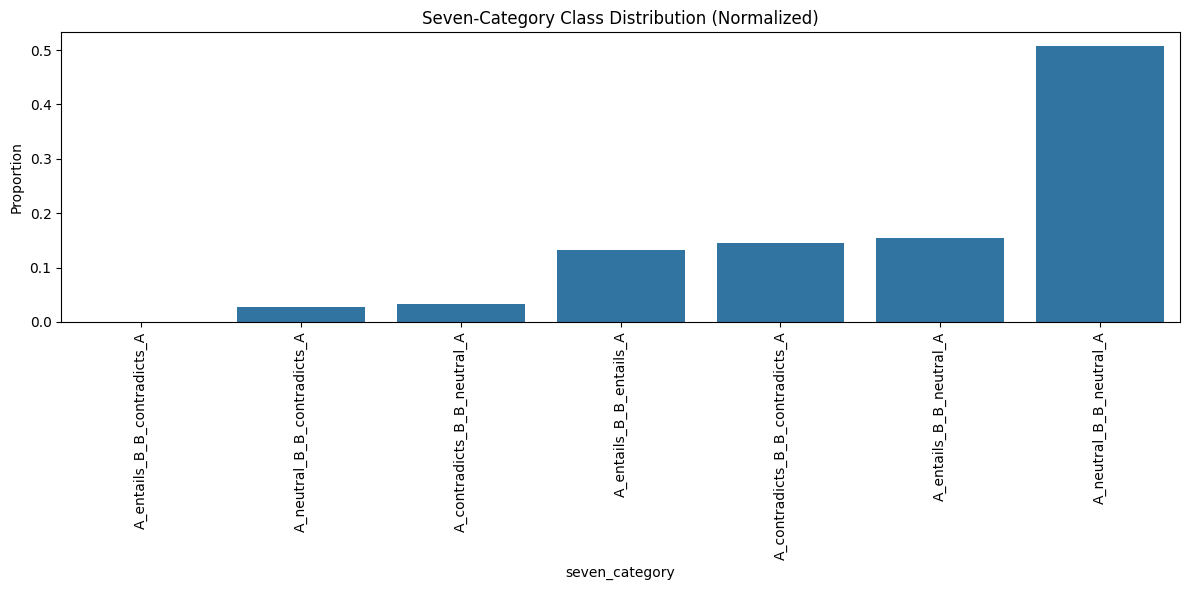


Minority class: A_entails_B_B_contradicts_A (0.0008)
Majority class: A_neutral_B_B_neutral_A (0.5073)
Imbalance ratio: 624.00:1


In [ ]:
# Calculate class distribution
seven_cat_dist = df['seven_category'].value_counts(normalize=True).sort_values()

print("Seven-category distribution (normalized):")
print(seven_cat_dist)

# Visualize class imbalance
plt.figure(figsize=(12, 6))
sns.barplot(x=seven_cat_dist.index, y=seven_cat_dist.values)
plt.title('Seven-Category Class Distribution (Normalized)')
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

# Identify minority and majority classes
minority_class = seven_cat_dist.index[0]
majority_class = seven_cat_dist.index[-1]

print(f"\nMinority class: {minority_class} ({seven_cat_dist[0]:.4f})")
print(f"Majority class: {majority_class} ({seven_cat_dist[-1]:.4f})")
print(f"Imbalance ratio: {seven_cat_dist[-1]/seven_cat_dist[0]:.2f}:1")

In [ ]:
# Use inplace=True to modify the original DataFrame directly
df.drop(['pair_ID','sentence_A_char_count','sentence_B_char_count','sentence_A_word_count','entailment_AB','entailment_BA','sentence_B_word_count'], axis=1, inplace=True)

In [ ]:
df

sentence_A  \
0     A group of kids is playing in a yard and an ol...   
1     A group of children is playing in the house an...   
2     The young boys are playing outdoors and the ma...   
3     The young boys are playing outdoors and the ma...   
4     The kids are playing outdoors near a man with ...   
...                                                 ...   
9835  A man is in a parking lot and is playing tenni...   
9836                   Someone is boiling okra in a pot   
9837  The man is singing heartily and playing the gu...   
9838        A man in blue has a yellow ball in the mitt   
9839               Three dogs are resting on a sidewalk   

                                             sentence_B  \
0     A group of boys in a yard is playing and a man...   
1     A group of kids is playing in a yard and an ol...   
2     The kids are playing outdoors near a man with ...   
3     There is no boy playing outdoors and there is ...   
4     A group of kids is playing in a yard and an ol...   
...                                                 ...   
9835  The snowboarder is leaping fearlessly over whi...   
9836                   The man is not playing the drums   
9837  A bicyclist is holding a bike over his head in...   
9838                      A man is jumping rope outside   
9839         The woman with a knife is slicing a pepper   

                       seven_category  
0             A_neutral_B_B_neutral_A  
1         A_contradicts_B_B_neutral_A  
2             A_entails_B_B_entails_A  
3     A_contradicts_B_B_contradicts_A  
4             A_neutral_B_B_neutral_A  
...                               ...  
9835          A_neutral_B_B_neutral_A  
9836          A_neutral_B_B_neutral_A  
9837          A_neutral_B_B_neutral_A  
9838          A_neutral_B_B_neutral_A  
9839          A_neutral_B_B_neutral_A  

[9840 rows x 3 columns]

#3. Class Imbalance Analysis

In [ ]:
# Target variable
combined_counts = df['seven_category'].value_counts()
print(combined_counts)
y = df['seven_category']

# Vectorize sentence_A
vectorizer_A = TfidfVectorizer(max_features=2500)
X_A = vectorizer_A.fit_transform(df['sentence_A'])
print(f"Sentence A features shape: {X_A.shape}")

# Vectorize sentence_B
vectorizer_B = TfidfVectorizer(max_features=2500)
X_B = vectorizer_B.fit_transform(df['sentence_B'])
print(f"Sentence B features shape: {X_B.shape}")

# Horizontally stack the feature matrices
X_combined = hstack([X_A, X_B])
print(f"Combined features shape: {X_combined.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, df['seven_category'], test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

seven_category
A_neutral_B_B_neutral_A            4992
A_entails_B_B_neutral_A            1513
A_contradicts_B_B_contradicts_A    1424
A_entails_B_B_entails_A            1300
A_contradicts_B_B_neutral_A         327
A_neutral_B_B_contradicts_A         276
A_entails_B_B_contradicts_A           8
Name: count, dtype: int64
Sentence A features shape: (9840, 2204)
Sentence B features shape: (9840, 2144)
Combined features shape: (9840, 4348)


In [ ]:
df

sentence_A  \
0     A group of kids is playing in a yard and an ol...   
1     A group of children is playing in the house an...   
2     The young boys are playing outdoors and the ma...   
3     The young boys are playing outdoors and the ma...   
4     The kids are playing outdoors near a man with ...   
...                                                 ...   
9835  A man is in a parking lot and is playing tenni...   
9836                   Someone is boiling okra in a pot   
9837  The man is singing heartily and playing the gu...   
9838        A man in blue has a yellow ball in the mitt   
9839               Three dogs are resting on a sidewalk   

                                             sentence_B  \
0     A group of boys in a yard is playing and a man...   
1     A group of kids is playing in a yard and an ol...   
2     The kids are playing outdoors near a man with ...   
3     There is no boy playing outdoors and there is ...   
4     A group of kids is playing in a yard and an ol...   
...                                                 ...   
9835  The snowboarder is leaping fearlessly over whi...   
9836                   The man is not playing the drums   
9837  A bicyclist is holding a bike over his head in...   
9838                      A man is jumping rope outside   
9839         The woman with a knife is slicing a pepper   

                       seven_category  
0             A_neutral_B_B_neutral_A  
1         A_contradicts_B_B_neutral_A  
2             A_entails_B_B_entails_A  
3     A_contradicts_B_B_contradicts_A  
4             A_neutral_B_B_neutral_A  
...                               ...  
9835          A_neutral_B_B_neutral_A  
9836          A_neutral_B_B_neutral_A  
9837          A_neutral_B_B_neutral_A  
9838          A_neutral_B_B_neutral_A  
9839          A_neutral_B_B_neutral_A  

[9840 rows x 3 columns]

Class distribution before SMOTE:
seven_category
A_contradicts_B_B_contradicts_A    1424
A_contradicts_B_B_neutral_A         327
A_entails_B_B_contradicts_A           8
A_entails_B_B_entails_A            1300
A_entails_B_B_neutral_A            1513
A_neutral_B_B_contradicts_A         276
A_neutral_B_B_neutral_A            4992
Name: count, dtype: int64

Class distribution after SMOTE:
seven_category
A_contradicts_B_B_contradicts_A    3994
A_contradicts_B_B_neutral_A        3994
A_entails_B_B_contradicts_A        3994
A_entails_B_B_entails_A            3994
A_entails_B_B_neutral_A            3994
A_neutral_B_B_contradicts_A        3994
A_neutral_B_B_neutral_A            3994
Name: count, dtype: int64

Synthetic samples created by SMOTE:
seven_category
A_contradicts_B_B_contradicts_A    2855
A_contradicts_B_B_neutral_A        3732
A_entails_B_B_contradicts_A        3988
A_entails_B_B_entails_A            2954
A_entails_B_B_neutral_A            2784
A_neutral_B_B_contradicts_A        3773


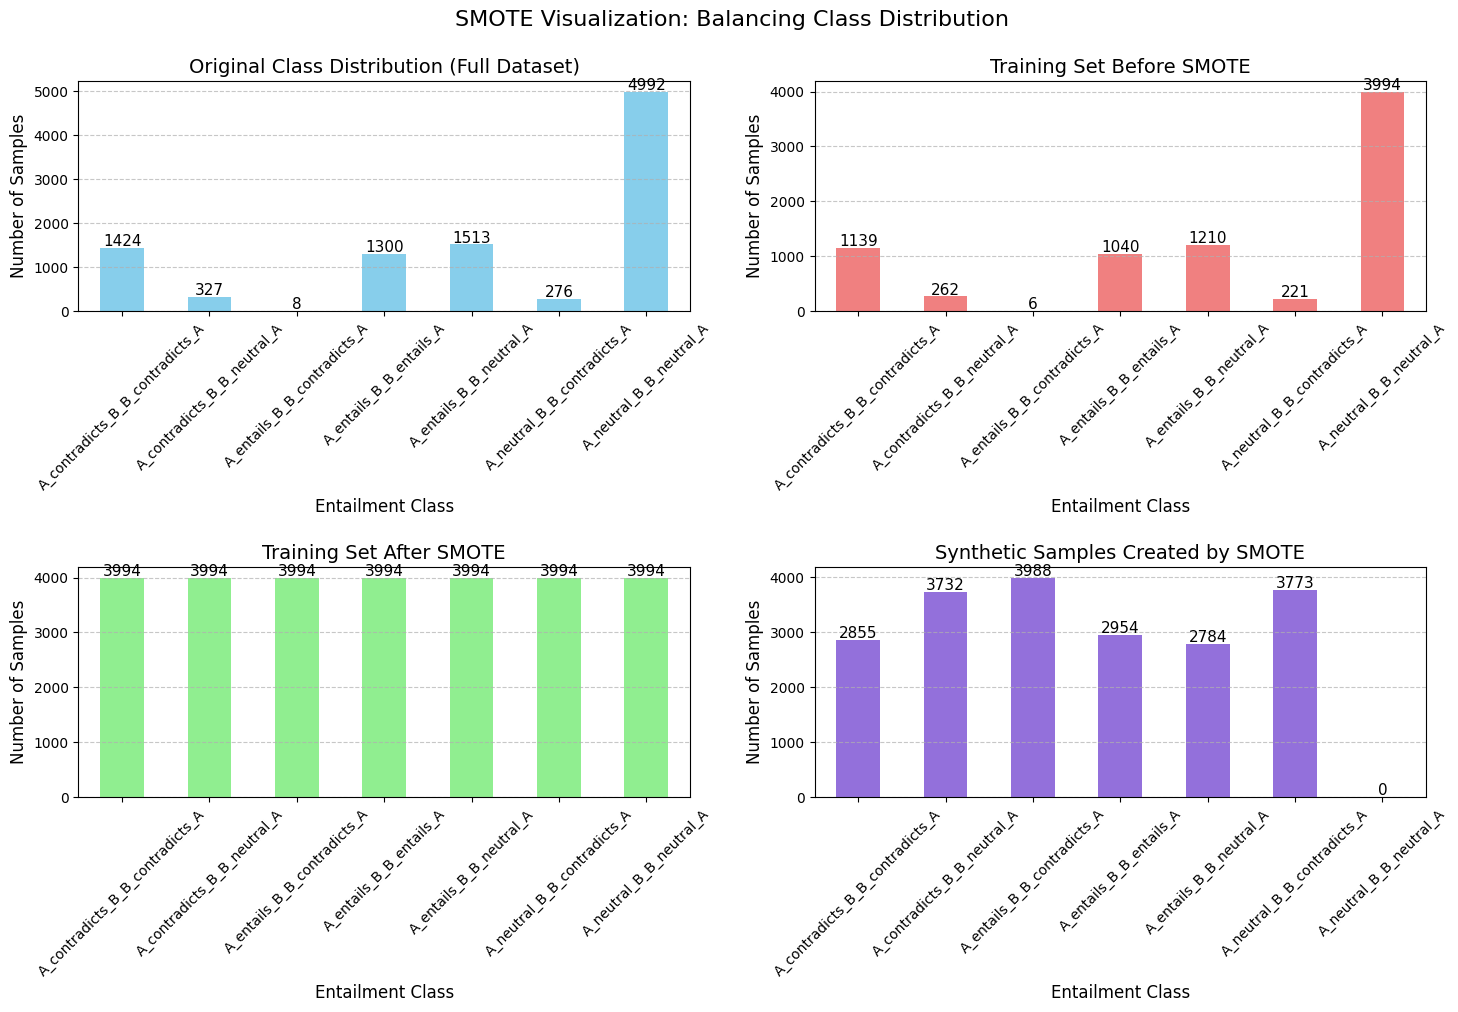

<Figure size 1200x600 with 0 Axes>

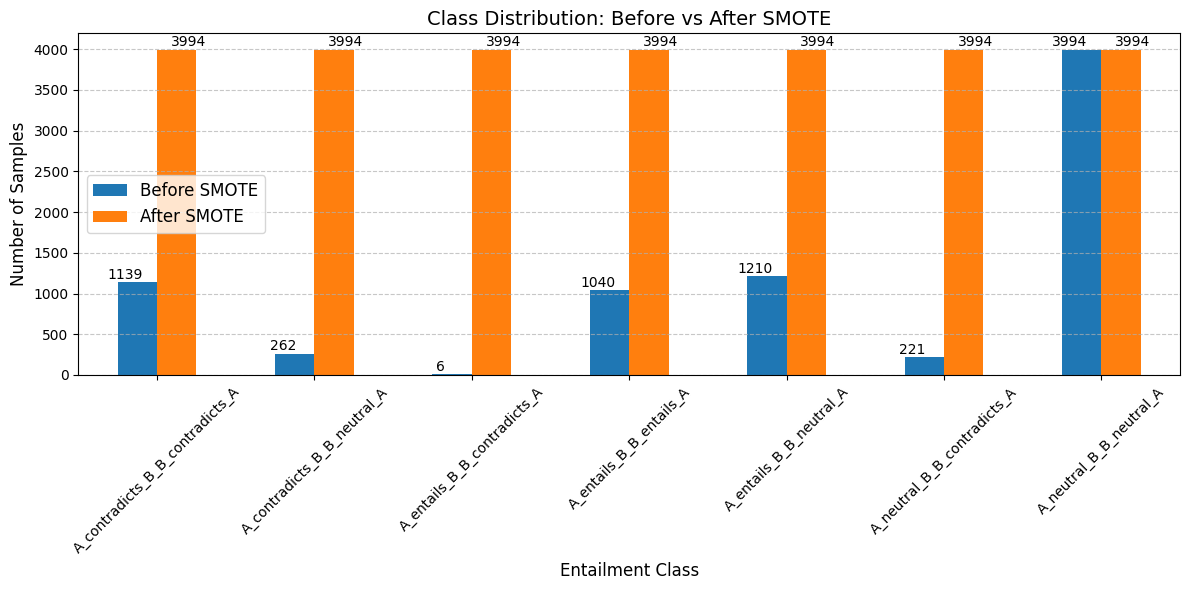

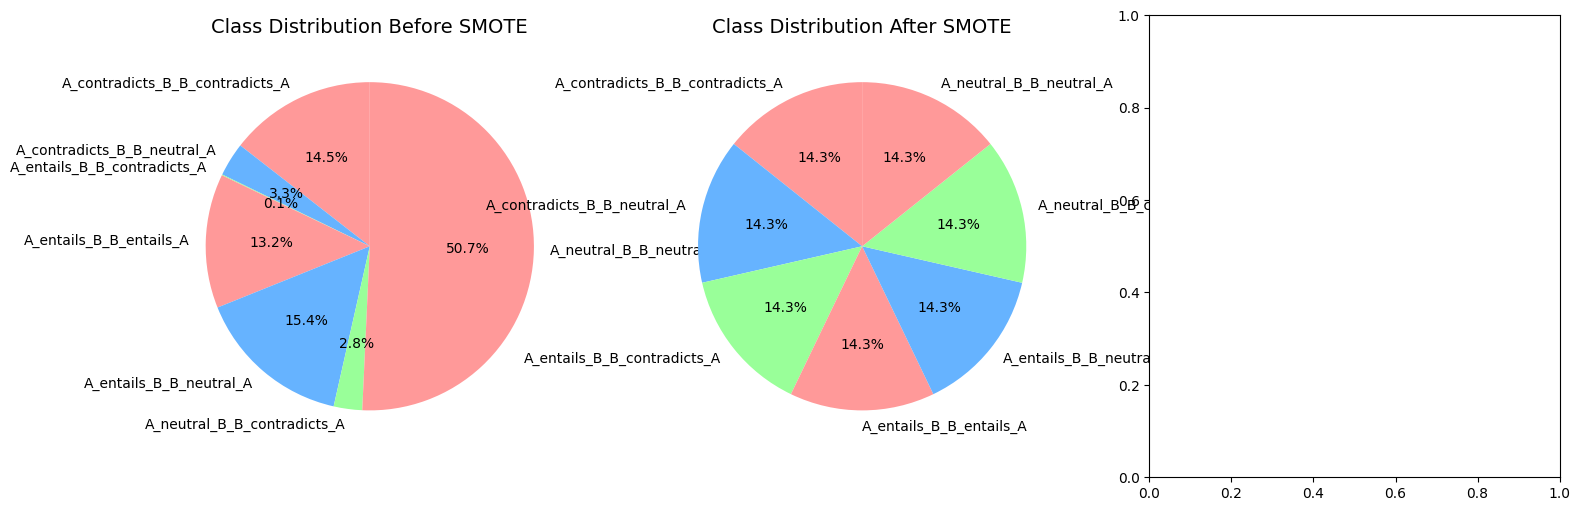

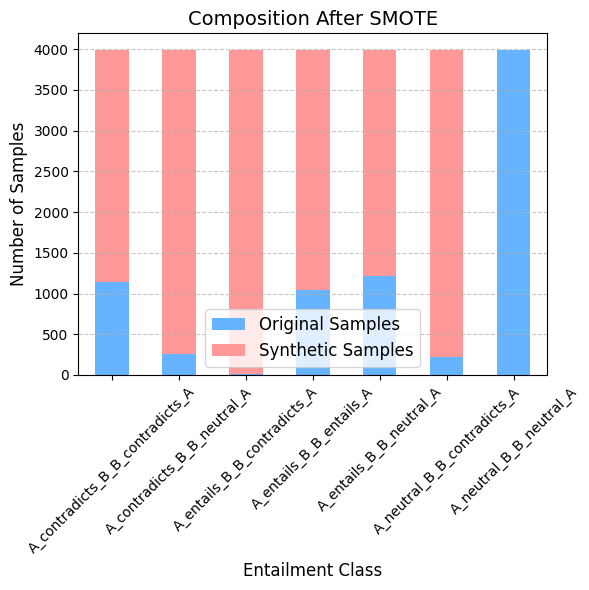

In [ ]:
# Get class distribution before SMOTE
class_counts_before = y.value_counts().sort_index()
print("Class distribution before SMOTE:")
print(class_counts_before)

# Get training set distribution before SMOTE
train_counts_before = y_train.value_counts().sort_index()

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Get distribution after SMOTE
train_counts_after = pd.Series(y_train_resampled).value_counts().sort_index()
print("\nClass distribution after SMOTE:")
print(train_counts_after)

# Calculate synthetic samples created
synthetic_samples = train_counts_after - train_counts_before
print("\nSynthetic samples created by SMOTE:")
print(synthetic_samples)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot 1: Original data distribution (full dataset)
plt.subplot(2, 2, 1)
class_counts_before.plot(kind='bar', color='skyblue')
plt.title('Original Class Distribution (Full Dataset)', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(class_counts_before):
    plt.text(i, count + 50, f'{count}', ha='center', fontsize=11)

# Plot 2: Training set before SMOTE
plt.subplot(2, 2, 2)
train_counts_before.plot(kind='bar', color='lightcoral')
plt.title('Training Set Before SMOTE', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(train_counts_before):
    plt.text(i, count + 40, f'{count}', ha='center', fontsize=11)

# Plot 3: Training set after SMOTE
plt.subplot(2, 2, 3)
train_counts_after.plot(kind='bar', color='lightgreen')
plt.title('Training Set After SMOTE', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(train_counts_after):
    plt.text(i, count + 40, f'{count}', ha='center', fontsize=11)

# Plot 4: Synthetic Samples created by SMOTE
plt.subplot(2, 2, 4)
synthetic_samples.plot(kind='bar', color='mediumpurple')
plt.title('Synthetic Samples Created by SMOTE', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, count in enumerate(synthetic_samples):
    plt.text(i, count + 40, f'{count}', ha='center', fontsize=11)

plt.tight_layout(pad=2.0)
plt.suptitle('SMOTE Visualization: Balancing Class Distribution', fontsize=16, y=1.02)
plt.show()

# Additional visualization: Before vs After on same plot
plt.figure(figsize=(12, 6))

# Combine before and after counts into a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Before SMOTE': train_counts_before,
    'After SMOTE': train_counts_after,
    'Synthetic Samples': synthetic_samples
})

comparison_df[['Before SMOTE', 'After SMOTE']].plot(kind='bar', figsize=(12, 6))
plt.title('Class Distribution: Before vs After SMOTE', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add count labels on bars
for i, (before, after) in enumerate(zip(train_counts_before, train_counts_after)):
    plt.text(i-0.2, before+40, f'{before}', ha='center', fontsize=10)
    plt.text(i+0.2, after+40, f'{after}', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('smote_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Create a pie chart showing original class distribution
plt.figure(figsize=(18, 6))

# Plot 1: Pie chart before SMOTE
plt.subplot(1, 3, 1)
class_names = class_counts_before.index
plt.pie(class_counts_before, labels=class_names, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Class Distribution Before SMOTE', fontsize=14)

# Plot 2: Pie chart after SMOTE
plt.subplot(1, 3, 2)
plt.pie(train_counts_after, labels=class_names, autopct='%1.1f%%',
        colors=['#ff9999','#66b3ff','#99ff99'], startangle=90)
plt.title('Class Distribution After SMOTE', fontsize=14)

# Plot 3: Stacked bar for total composition
plt.subplot(1, 3, 3)
original_samples = train_counts_before.copy()
synthetic = synthetic_samples.copy()

composition_df = pd.DataFrame({
    'Original Samples': original_samples,
    'Synthetic Samples': synthetic
})

composition_df.plot(kind='bar', stacked=True, figsize=(6, 6),
                   color=['#66b3ff', '#ff9999'])
plt.title('Composition After SMOTE', fontsize=14)
plt.xlabel('Entailment Class', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

plt.tight_layout()
plt.show()

Trial 20 Complete [00h 11m 49s]
val_accuracy: 0.5970528721809387

Best val_accuracy So Far: 0.605182945728302
Total elapsed time: 20h 18m 36s

Best hyperparameters:
LSTM Units: 384
Dropout Rate: 0.30000000000000004
Learning Rate: 0.0001
Use Batch Normalization: False
Number of Dense Layers: 3

Training final model with best hyperparameters...
Epoch 1/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2926 - loss: 1.7415
Epoch 1: val_accuracy improved from -inf to 0.52083, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.2926 - loss: 1.7414 - val_accuracy: 0.5208 - val_loss: 1.3136 - learning_rate: 1.0000e-04
Epoch 2/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4662 - loss: 1.3393
Epoch 2: val_accuracy improved from 0.52083 to 0.52490, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.4662 - loss: 1.3393 - val_accuracy: 0.5249 - val_loss: 1.2581 - learning_rate: 1.0000e-04
Epoch 3/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5165 - loss: 1.2079
Epoch 3: val_accuracy improved from 0.52490 to 0.55335, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.5165 - loss: 1.2079 - val_accuracy: 0.5534 - val_loss: 1.2108 - learning_rate: 1.0000e-04
Epoch 4/100
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5472 - loss: 1.1210
Epoch 4: val_accuracy did not improve from 0.55335
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.5472 - loss: 1.1210 - val_accuracy: 0.5437 - val_loss: 1.1573 - learning_rate: 1.0000e-04
Epoch 5/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5802 - loss: 1.0569
Epoch 5: val_accuracy improved from 0.55335 to 0.55843, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.5802 - loss: 1.0569 - val_accuracy: 0.5584 - val_loss: 1.1488 - learning_rate: 1.0000e-04
Epoch 6/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6103 - loss: 0.9893
Epoch 6: val_accuracy did not improve from 0.55843
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 31ms/step - accuracy: 0.6102 - loss: 0.9893 - val_accuracy: 0.5452 - val_loss: 1.1626 - learning_rate: 1.0000e-04
Epoch 7/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6356 - loss: 0.9202
Epoch 7: val_accuracy improved from 0.55843 to 0.56707, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.6356 - loss: 0.9202 - val_accuracy: 0.5671 - val_loss: 1.1332 - learning_rate: 1.0000e-04
Epoch 8/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6732 - loss: 0.8462
Epoch 8: val_accuracy did not improve from 0.56707
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.6732 - loss: 0.8462 - val_accuracy: 0.5666 - val_loss: 1.1608 - learning_rate: 1.0000e-04
Epoch 9/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7007 - loss: 0.7874
Epoch 9: val_accuracy improved from 0.56707 to 0.58130, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.7006 - loss: 0.7874 - val_accuracy: 0.5813 - val_loss: 1.1525 - learning_rate: 1.0000e-04
Epoch 10/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7326 - loss: 0.7025
Epoch 10: val_accuracy did not improve from 0.58130

Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 52s 30ms/step - accuracy: 0.7325 - loss: 0.7025 - val_accuracy: 0.5788 - val_loss: 1.2276 - learning_rate: 1.0000e-04
Epoch 11/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7859 - loss: 0.5830
Epoch 11: val_accuracy improved from 0.58130 to 0.59756, saving model to best_model_with_bn.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 53s 30ms/step - accuracy: 0.7859 - loss: 0.5830 - val_accuracy: 0.5976 - val_loss: 1.2194 - learning_rate: 5.0000e-05
Epoch 12/100
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8211 - loss: 0.4941
Epoch 12: val_accuracy did not improve from 0.59756
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 54s 31ms/step - accuracy: 0.8211 - loss: 0.4941 - val_accuracy: 0.5899 - val_loss: 1.2468 - learning_rate: 5.0000e-05

Evaluating final model...
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5548 - loss: 1.1418
Test accuracy: 0.5671

Generating predictions for test set...
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step

Classification Report:
                                 precision    recall  f1-score   support

A_contradicts_B_B_contradicts_A       0.66      0.73      0.69       285
    A_contradicts_B_B_neutral_A       0.12      0.02      0.03        65
    A_entails_B_B_contradicts_A       0.00      0.00      0.00         2
        A_entails_B_B_entails_A       0

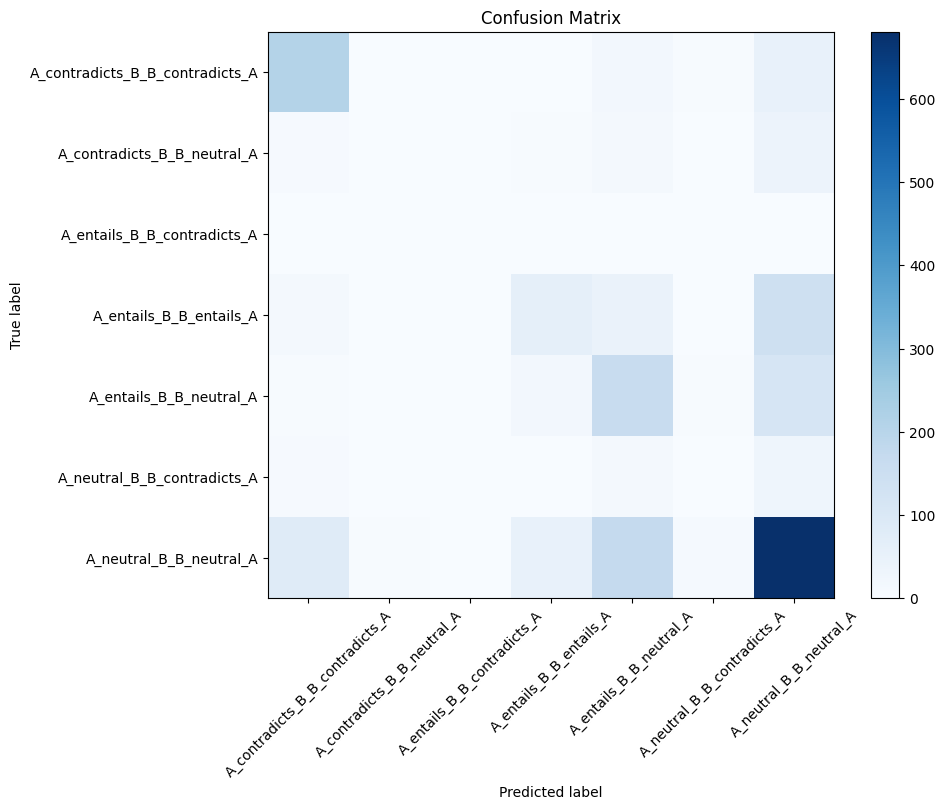

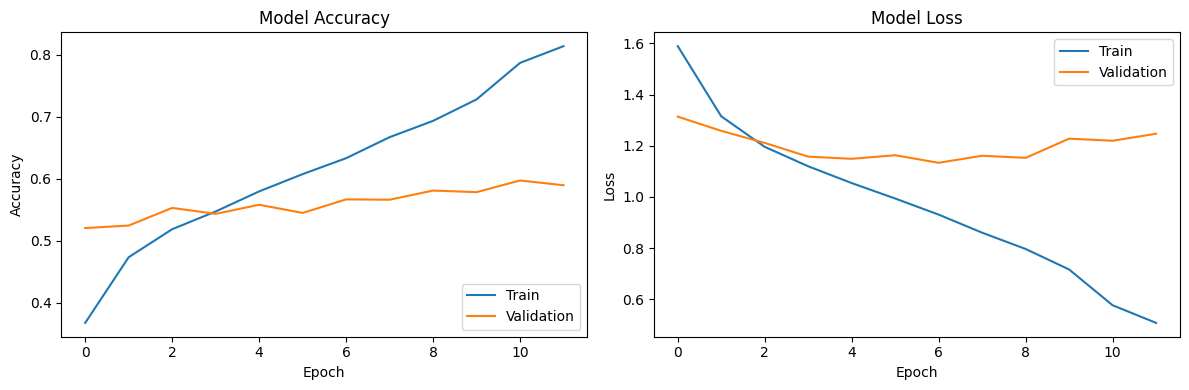

Model saved successfully.

Testing prediction function with example sentences:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Sentence A: The cat is sleeping on the couch.
Sentence B: The feline is resting on the sofa.
Predicted relationship: A_entails_B_B_contradicts_A (confidence: 0.5040)


In [ ]:
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from keras_tuner.engine.hyperparameters import HyperParameters

tf.keras.backend.clear_session()

# Step 1: Load the dataset
print("Loading dataset...")
df = pd.read_csv('sentence_data.csv')
print(f"Dataset shape: {df.shape}")

# Step 2: Create combined category labels and encode
df['combined_category'] = df['entailment_AB'] + '_' + df['entailment_BA']
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['combined_category'])
num_classes = len(label_encoder.classes_)

print("\nNumber of classes:", num_classes)
print("Category mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

# Step 3: Text preprocessing parameters
max_words = 10000  # Max vocabulary size
max_len = 50       # Max sequence length

# Initialize tokenizer
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['sentence_A'].tolist() + df['sentence_B'].tolist())

# Define vocab_size here after tokenizer is fit
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, max_words)
print(f"Vocabulary size: {vocab_size}")

# Convert text to sequences
sequences_A = tokenizer.texts_to_sequences(df['sentence_A'])
sequences_B = tokenizer.texts_to_sequences(df['sentence_B'])

# Pad sequences
padded_A = pad_sequences(sequences_A, maxlen=max_len, padding='post')
padded_B = pad_sequences(sequences_B, maxlen=max_len, padding='post')

# Prepare labels
labels = to_categorical(df['category_encoded'], num_classes=num_classes)

# Step 4: Split data
X_A_train, X_A_test, X_B_train, X_B_test, y_train, y_test = train_test_split(
    padded_A, padded_B, labels, test_size=0.2, random_state=42, stratify=df['category_encoded']
)

print(f"Training set shapes: A={X_A_train.shape}, B={X_B_train.shape}, y={y_train.shape}")
print(f"Test set shapes: A={X_A_test.shape}, B={X_B_test.shape}, y={y_test.shape}")

# Get class distribution before SMOTE
y_train_classes = np.argmax(y_train, axis=1)
train_counts_before = pd.Series(y_train_classes).value_counts().sort_index()
print("\nTraining set class distribution before SMOTE:")
for i, count in enumerate(train_counts_before):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 5: Apply SMOTE to balance the dataset
print("\nApplying SMOTE...")

# SMOTE requires flat features, so we need to reshape our inputs
X_combined = np.hstack([X_A_train, X_B_train])

# Apply SMOTE to the combined feature matrix
smote = SMOTE(random_state=42)
X_combined_resampled, y_train_resampled_indices = smote.fit_resample(X_combined, y_train_classes)

# Convert the resampled indices back to one-hot encoded labels
y_train_resampled = to_categorical(y_train_resampled_indices, num_classes=num_classes)

# Split the combined feature matrix back into separate inputs
X_A_train_resampled = X_combined_resampled[:, :max_len]
X_B_train_resampled = X_combined_resampled[:, max_len:]

# Class distribution after SMOTE
train_counts_after = pd.Series(y_train_resampled_indices).value_counts().sort_index()
print("\nTraining set class distribution after SMOTE:")
for i, count in enumerate(train_counts_after):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 6: Load pretrained embeddings
print("\nLoading pretrained embeddings...")
embedding_dim = 300  # GloVe/Word2Vec typically use 300-dimensional vectors

# Path to the pre-trained embeddings file (use appropriate path)
embedding_file = 'glove.6B.300d.txt'  # Or your path to embeddings

# Initialize embedding matrix with zeros
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Load embedding vectors from file
embeddings_index = {}
with open(embedding_file, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Fill embedding matrix
num_words_found = 0
for word, i in word_index.items():
    if i >= max_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be zeros
        embedding_matrix[i] = embedding_vector
        num_words_found += 1

print(f"Found embeddings for {num_words_found} words")

# Step 7: Define model building function for hyperparameter tuning
def build_model(hp):
    # Hyperparameters to tune
    lstm_units = hp.Int('lstm_units', min_value=64, max_value=128, step=64)
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 2e-3, 3e-3, 4e-3,5e-4, 1e-3, 5e-3])
    use_batch_norm = hp.Boolean('batch_normalization')
    dense_layers = hp.Int('dense_layers', min_value=2, max_value=6)

    # Shared embedding layer - using pretrained embeddings
    embedding_layer = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=False
    )

    # Define inputs
    input_A = Input(shape=(max_len,), name='input_A')
    input_B = Input(shape=(max_len,), name='input_B')

    # Process sentence A
    embedded_A = embedding_layer(input_A)
    encoded_A = Bidirectional(LSTM(lstm_units))(embedded_A)

    # Process sentence B
    embedded_B = embedding_layer(input_B)
    encoded_B = Bidirectional(LSTM(lstm_units))(embedded_B)

    # Combine the separate representations
    combined = Concatenate()([encoded_A, encoded_B])

    # Add batch normalization after concatenation if selected
    if use_batch_norm:
        combined = BatchNormalization()(combined)

    # Build dynamic dense layers based on hyperparameters
    x = combined
    units = 1024

    for i in range(dense_layers):
        x = Dense(units, activation='relu')(x)

        # Add batch normalization if selected
        if use_batch_norm:
            x = BatchNormalization()(x)

        x = Dropout(dropout_rate)(x)
        units = units // 2  # Halve the number of units for each layer

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[input_A, input_B], outputs=output)

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 8: Set up hyperparameter tuning
print("\nSetting up hyperparameter tuning...")

# First, make sure keras_tuner is installed
try:
    import keras_tuner
except ImportError:
    print("Installing keras_tuner...")
    !pip install -q keras-tuner

tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Number of different hyperparameter combinations to try
    directory='hp_tuning',
    project_name='entailment_classifier'
)

# Create early stopping callback for each trial
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Step 9: Perform hyperparameter search
print("\nStarting hyperparameter search...")
tuner.search(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    epochs=30,
    batch_size=16,
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters:")
print(f"LSTM Units: {best_hps.get('lstm_units')}")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Use Batch Normalization: {best_hps.get('batch_normalization')}")
print(f"Number of Dense Layers: {best_hps.get('dense_layers')}")

# Step 10: Train the model with the best hyperparameters
print("\nTraining final model with best hyperparameters...")
best_model = tuner.hypermodel.build(best_hps)

# Add model checkpoint for the best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model_with_bn.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Define learning rate scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the final model
history = best_model.fit(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Step 11: Evaluate final model
print("\nEvaluating final model...")
test_loss, test_accuracy = best_model.evaluate([X_A_test, X_B_test], y_test, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Step 12: Make predictions and analyze performance
print("\nGenerating predictions for test set...")
y_pred_probs = best_model.predict([X_A_test, X_B_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate per-class metrics
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Step 13: Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.savefig('training_history_with_bn.png')
plt.show()

# Save the model
best_model.save('final_entailment_model_with_bn.h5')
print("Model saved successfully.")

# Function for making predictions on new sentence pairs
def predict_entailment(sentence_a, sentence_b):
    # Tokenize and pad the new sentences
    seq_a = tokenizer.texts_to_sequences([sentence_a])
    seq_b = tokenizer.texts_to_sequences([sentence_b])
    padded_a = pad_sequences(seq_a, maxlen=max_len, padding='post')
    padded_b = pad_sequences(seq_b, maxlen=max_len, padding='post')

    # Make prediction
    prediction = best_model.predict([padded_a, padded_b])[0]
    predicted_class = np.argmax(prediction)

    # Get the class name and confidence
    class_name = label_encoder.classes_[predicted_class]
    confidence = prediction[predicted_class]

    return class_name, confidence

# Example usage
print("\nTesting prediction function with example sentences:")
example_a = "The cat is sleeping on the couch."
example_b = "The feline is resting on the sofa."
result, confidence = predict_entailment(example_a, example_b)
print(f"Sentence A: {example_a}")
print(f"Sentence B: {example_b}")
print(f"Predicted relationship: {result} (confidence: {confidence:.4f})")

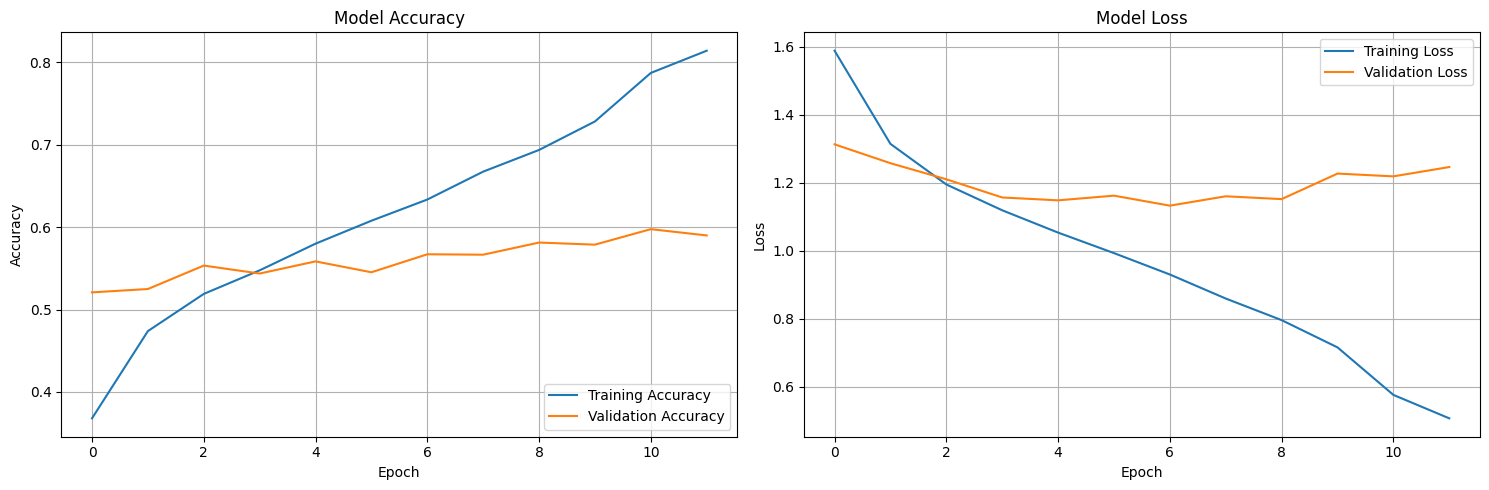

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


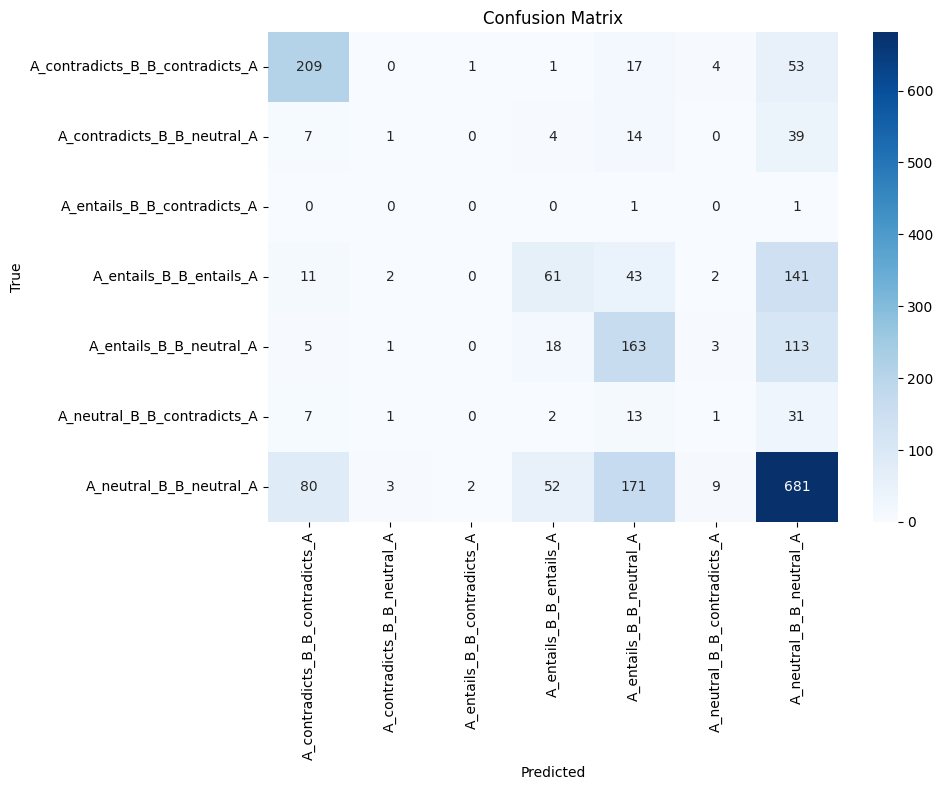


Classification Report:
                                 precision    recall  f1-score   support

A_contradicts_B_B_contradicts_A       0.66      0.73      0.69       285
    A_contradicts_B_B_neutral_A       0.12      0.02      0.03        65
    A_entails_B_B_contradicts_A       0.00      0.00      0.00         2
        A_entails_B_B_entails_A       0.44      0.23      0.31       260
        A_entails_B_B_neutral_A       0.39      0.54      0.45       303
    A_neutral_B_B_contradicts_A       0.05      0.02      0.03        55
        A_neutral_B_B_neutral_A       0.64      0.68      0.66       998

                       accuracy                           0.57      1968
                      macro avg       0.33      0.32      0.31      1968
                   weighted avg       0.54      0.57      0.55      1968


===== TESTING RANDOM SAMPLES =====

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Sentence A: A dog is running through the snow
Sentence B: No dog is running through the snow
Pr

In [ ]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Create a figure with 2 subplots (1 row, 2 columns)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Training Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')
    ax1.grid(True)

    # Plot loss
    ax2.plot(history.history['loss'], label='Training Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function to plot training history
plot_training_history(history)

# Function to visualize confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.show()

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

# Get predictions on test set
y_pred_prob = best_model.predict([X_A_test, X_B_test])
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Plot confusion matrix
plot_confusion_matrix(y_true_classes, y_pred_classes, label_encoder.classes_)

# Function to make predictions on sample sentences
def predict_relation(sentence_A, sentence_B):
    # Preprocess the sentences
    seq_A = tokenizer.texts_to_sequences([sentence_A])
    seq_B = tokenizer.texts_to_sequences([sentence_B])

    pad_A = pad_sequences(seq_A, maxlen=max_len, padding='post')
    pad_B = pad_sequences(seq_B, maxlen=max_len, padding='post')

    # Make prediction
    prediction =  best_model.predict([pad_A, pad_B])
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = label_encoder.classes_[predicted_class]

    # Get probability
    probability = prediction[0][predicted_class]

    # Print results
    print(f"Sentence A: {sentence_A}")
    print(f"Sentence B: {sentence_B}")
    print(f"Predicted relation: {predicted_label} with confidence {probability:.4f}")

    return predicted_label, probability

# Sample random examples from test set and make predictions
def test_random_samples(num_samples=5):
    print("\n===== TESTING RANDOM SAMPLES =====\n")

    # Randomly select sample indices
    sample_indices = np.random.choice(len(X_A_test), num_samples, replace=False)

    for idx in sample_indices:
        # Get actual sentences from tokenized sequences
        # We need to map back from sequences to original text
        sentence_A_seq = X_A_test[idx]
        sentence_B_seq = X_B_test[idx]

        # Find corresponding indices in the original dataset
        # This is a bit tricky without original indices
        # A workaround is to get original sentences from the main dataframe
        test_indices = np.arange(len(df))[int(len(df)*0.8):]  # Assuming 20% test split
        if idx < len(test_indices):
            orig_idx = test_indices[idx]
            sentence_A = df.iloc[orig_idx]['sentence_A']
            sentence_B = df.iloc[orig_idx]['sentence_B']

            # Get true label
            true_label = label_encoder.classes_[np.argmax(y_test[idx])]

            # Make prediction
            predicted_label, probability = predict_relation(sentence_A, sentence_B)

            # Print comparison
            print(f"True relation: {true_label}")
            print(f"Match: {'✓' if predicted_label == true_label else '✗'}")
            print("-" * 50)
        else:
            # If we can't retrieve the original text, create a manual test
            print("Using custom test examples instead...")
            break

# Alternative approach - create some custom test examples
def test_custom_examples():
    print("\n===== TESTING CUSTOM EXAMPLES =====\n")

    # Define some example pairs
    test_pairs = [
        # Examples to test, modify as needed for your dataset domain
        ("The cat is on the mat", "A feline is resting on a floor covering"),
        ("The movie was excellent", "I enjoyed the film very much"),
        ("Birds can fly in the sky", "Fish swim in the ocean"),
        ("She went to the store", "She visited the shop"),
        ("Programming is fun", "Coding is boring")
    ]

    for sentence_A, sentence_B in test_pairs:
        predict_relation(sentence_A, sentence_B)
        print("-" * 50)

# Try both methods
try:
    test_random_samples(5)
except Exception as e:
    print(f"Error with random samples: {e}")

test_custom_examples()


##GloVe with Attention

Trial 11 Complete [00h 12m 18s]
val_accuracy: 0.5813007950782776

Best val_accuracy So Far: 0.6122967600822449
Total elapsed time: 02h 34m 08s

Best hyperparameters:
LSTM Units: 256
Dropout Rate: 0.2
Learning Rate: 0.0001
Use Batch Normalization: True
Number of Dense Layers: 2
Attention Type: basic

Training final model with best hyperparameters...
Epoch 1/50
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2738 - loss: 2.1280
Epoch 1: val_accuracy improved from -inf to 0.50305, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.2738 - loss: 2.1277 - val_accuracy: 0.5030 - val_loss: 1.4283 - learning_rate: 1.0000e-04
Epoch 2/50
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3920 - loss: 1.6473
Epoch 2: val_accuracy improved from 0.50305 to 0.53862, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.3920 - loss: 1.6472 - val_accuracy: 0.5386 - val_loss: 1.2899 - learning_rate: 1.0000e-04
Epoch 3/50
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4453 - loss: 1.4698
Epoch 3: val_accuracy improved from 0.53862 to 0.54522, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.4453 - loss: 1.4698 - val_accuracy: 0.5452 - val_loss: 1.3357 - learning_rate: 1.0000e-04
Epoch 4/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.4831 - loss: 1.3531
Epoch 4: val_accuracy improved from 0.54522 to 0.55539, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.4831 - loss: 1.3531 - val_accuracy: 0.5554 - val_loss: 1.2777 - learning_rate: 1.0000e-04
Epoch 5/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5157 - loss: 1.2720
Epoch 5: val_accuracy did not improve from 0.55539
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - accuracy: 0.5157 - loss: 1.2720 - val_accuracy: 0.5234 - val_loss: 1.2840 - learning_rate: 1.0000e-04
Epoch 6/50
1746/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5400 - loss: 1.1960
Epoch 6: val_accuracy improved from 0.55539 to 0.56911, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.5400 - loss: 1.1960 - val_accuracy: 0.5691 - val_loss: 1.1960 - learning_rate: 1.0000e-04
Epoch 7/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5718 - loss: 1.1186
Epoch 7: val_accuracy improved from 0.56911 to 0.57317, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.5718 - loss: 1.1186 - val_accuracy: 0.5732 - val_loss: 1.1679 - learning_rate: 1.0000e-04
Epoch 8/50
1746/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5913 - loss: 1.0628
Epoch 8: val_accuracy improved from 0.57317 to 0.57673, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.5913 - loss: 1.0629 - val_accuracy: 0.5767 - val_loss: 1.1714 - learning_rate: 1.0000e-04
Epoch 9/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6229 - loss: 1.0036
Epoch 9: val_accuracy did not improve from 0.57673
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.6229 - loss: 1.0036 - val_accuracy: 0.5478 - val_loss: 1.2106 - learning_rate: 1.0000e-04
Epoch 10/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6372 - loss: 0.9529
Epoch 10: val_accuracy did not improve from 0.57673

Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.6372 - loss: 0.9529 - val_accuracy: 0.5686 - val_loss: 1.2731 - learning_rate: 1.0000e-04
Epoch 11/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6714 - loss: 0.8769
Epoch 11: val_accuracy improved from 0.57673 to 0.60061, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.6714 - loss: 0.8769 - val_accuracy: 0.6006 - val_loss: 1.1791 - learning_rate: 5.0000e-05
Epoch 12/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6917 - loss: 0.8267
Epoch 12: val_accuracy did not improve from 0.60061
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.6917 - loss: 0.8267 - val_accuracy: 0.5879 - val_loss: 1.1547 - learning_rate: 5.0000e-05
Epoch 13/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7072 - loss: 0.7861
Epoch 13: val_accuracy did not improve from 0.60061
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 63s 36ms/step - accuracy: 0.7072 - loss: 0.7861 - val_accuracy: 0.5813 - val_loss: 1.1685 - learning_rate: 5.0000e-05
Epoch 14/50
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7303 - loss: 0.7386
Epoch 14: val_accuracy improved from 0.60061 to 0.60467, saving model to best_model_with_attention.h5


1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - accuracy: 0.7303 - loss: 0.7386 - val_accuracy: 0.6047 - val_loss: 1.1688 - learning_rate: 5.0000e-05
Epoch 15/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7377 - loss: 0.7149
Epoch 15: val_accuracy did not improve from 0.60467

Epoch 15: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.7377 - loss: 0.7149 - val_accuracy: 0.5854 - val_loss: 1.1723 - learning_rate: 5.0000e-05
Epoch 16/50
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7577 - loss: 0.6566
Epoch 16: val_accuracy did not improve from 0.60467
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 64s 36ms/step - accuracy: 0.7577 - loss: 0.6566 - val_accuracy: 0.6021 - val_loss: 1.1773 - learning_rate: 2.5000e-05
Epoch 17/50
1747/1748 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7823 - loss: 0.6205
Epoch 17: val_accuracy did not improve from 0.60467
1748/1748 ━━━━━━━━━━━━━━━━━━━━ 65s 37ms/step - ac

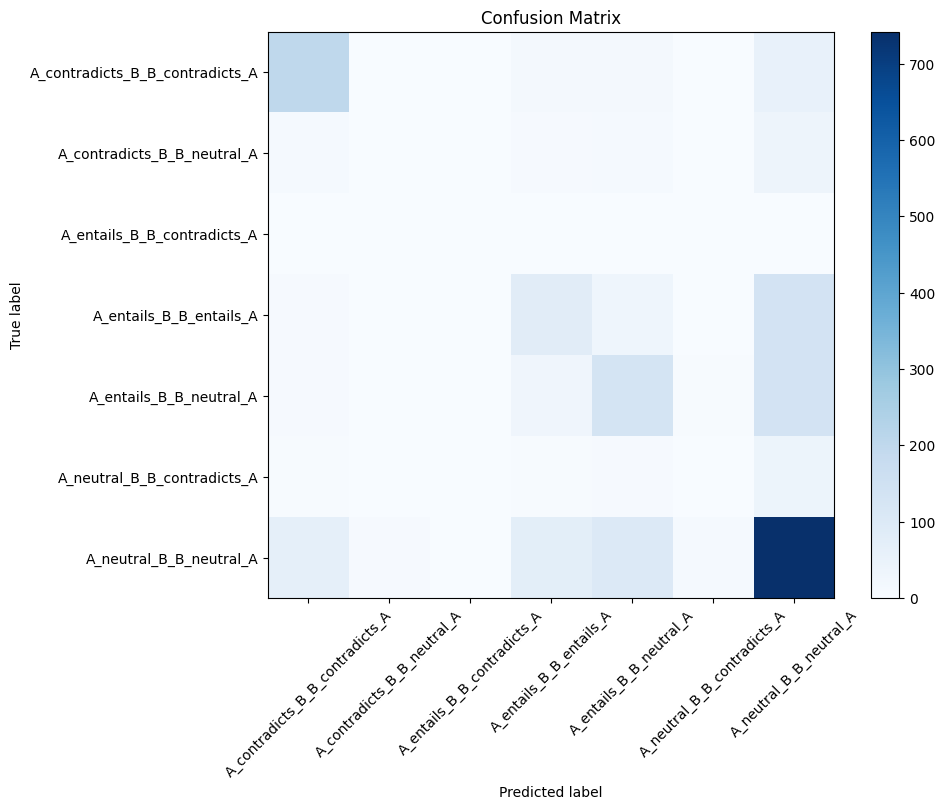

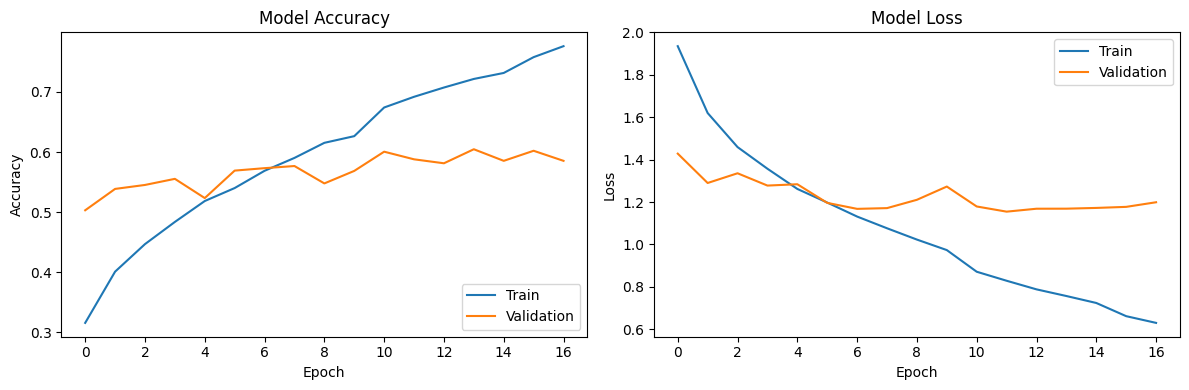

Model saved successfully.

Testing prediction function with example sentences:


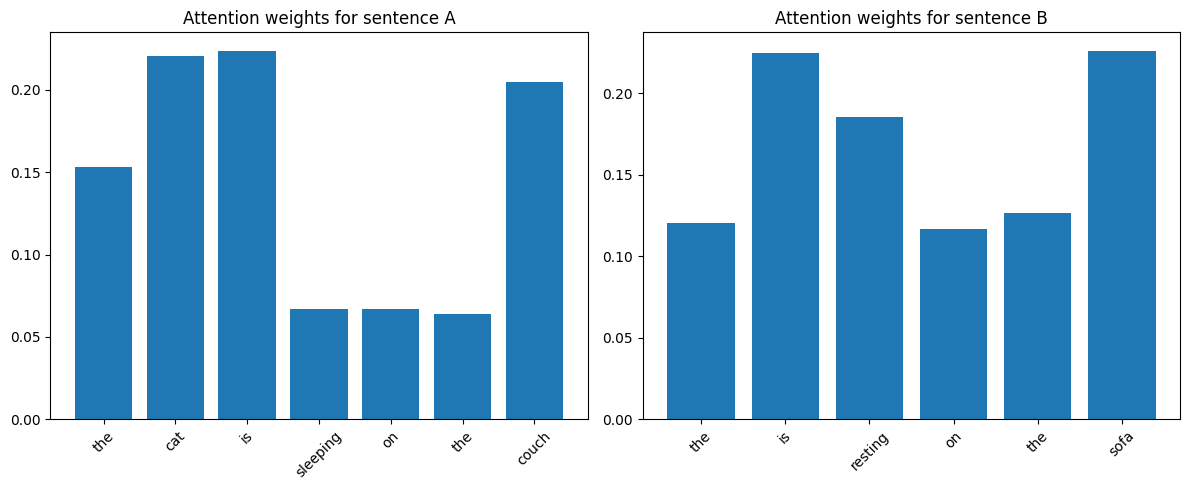

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Sentence A: The cat is sleeping on the couch.
Sentence B: The feline is resting on the sofa.
Predicted relationship: A_contradicts_B_B_contradicts_A (confidence: 0.5867)


In [ ]:
  import tensorflow as tf
  from tensorflow.keras.layers import Layer, Dense, Dropout, Concatenate, BatchNormalization, TimeDistributed
  from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional
  from keras_tuner import RandomSearch, Hyperband, BayesianOptimization


  # Custom Attention Layer
  class AttentionLayer(Layer):
      def __init__(self, **kwargs):
          super(AttentionLayer, self).__init__(**kwargs)

      def build(self, input_shape):
          self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                  initializer="normal")
          self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                  initializer="zeros")
          super(AttentionLayer, self).build(input_shape)

      def call(self, x):
          # Alignment scores. Shape: (batch_size, seq_len, 1)
          e = tf.nn.tanh(tf.matmul(x, self.W) + self.b)

          # Attention weights. Shape: (batch_size, seq_len, 1)
          a = tf.nn.softmax(e, axis=1)

          # Weighted sum. Shape: (batch_size, features)
          output = tf.reduce_sum(x * a, axis=1)

          return output

      def compute_output_shape(self, input_shape):
          return input_shape[0], input_shape[-1]

      def get_config(self):
          return super(AttentionLayer, self).get_config()

  tf.keras.backend.clear_session()

  # Step 1: Load the dataset
  print("Loading dataset...")
  df = pd.read_csv('sentence_data.csv')
  print(f"Dataset shape: {df.shape}")

  # Step 2: Create combined category labels and encode
  df['combined_category'] = df['entailment_AB'] + '_' + df['entailment_BA']
  label_encoder = LabelEncoder()
  df['category_encoded'] = label_encoder.fit_transform(df['combined_category'])
  num_classes = len(label_encoder.classes_)

  print("\nNumber of classes:", num_classes)
  print("Category mapping:")
  for i, category in enumerate(label_encoder.classes_):
      print(f"{i}: {category}")

  # Step 3: Text preprocessing parameters
  max_words = 10000  # Max vocabulary size
  max_len = 50       # Max sequence length

  # Initialize tokenizer
  tokenizer = Tokenizer(num_words=max_words)
  tokenizer.fit_on_texts(df['sentence_A'].tolist() + df['sentence_B'].tolist())

  # Define vocab_size here after tokenizer is fit
  word_index = tokenizer.word_index
  vocab_size = min(len(word_index) + 1, max_words)
  print(f"Vocabulary size: {vocab_size}")

  # Convert text to sequences
  sequences_A = tokenizer.texts_to_sequences(df['sentence_A'])
  sequences_B = tokenizer.texts_to_sequences(df['sentence_B'])

  # Pad sequences
  padded_A = pad_sequences(sequences_A, maxlen=max_len, padding='post')
  padded_B = pad_sequences(sequences_B, maxlen=max_len, padding='post')

  # Prepare labels
  labels = to_categorical(df['category_encoded'], num_classes=num_classes)

  # Step 4: Split data
  X_A_train, X_A_test, X_B_train, X_B_test, y_train, y_test = train_test_split(
      padded_A, padded_B, labels, test_size=0.2, random_state=42, stratify=df['category_encoded']
  )

  print(f"Training set shapes: A={X_A_train.shape}, B={X_B_train.shape}, y={y_train.shape}")
  print(f"Test set shapes: A={X_A_test.shape}, B={X_B_test.shape}, y={y_test.shape}")

  # Get class distribution before SMOTE
  y_train_classes = np.argmax(y_train, axis=1)
  train_counts_before = pd.Series(y_train_classes).value_counts().sort_index()
  print("\nTraining set class distribution before SMOTE:")
  for i, count in enumerate(train_counts_before):
      print(f"{i} ({label_encoder.classes_[i]}): {count}")

  # Step 5: Apply SMOTE to balance the dataset
  print("\nApplying SMOTE...")

  # SMOTE requires flat features, so we need to reshape our inputs
  X_combined = np.hstack([X_A_train, X_B_train])

  # Apply SMOTE to the combined feature matrix
  smote = SMOTE(random_state=42)
  X_combined_resampled, y_train_resampled_indices = smote.fit_resample(X_combined, y_train_classes)

  # Convert the resampled indices back to one-hot encoded labels
  y_train_resampled = to_categorical(y_train_resampled_indices, num_classes=num_classes)

  # Split the combined feature matrix back into separate inputs
  X_A_train_resampled = X_combined_resampled[:, :max_len]
  X_B_train_resampled = X_combined_resampled[:, max_len:]

  # Class distribution after SMOTE
  train_counts_after = pd.Series(y_train_resampled_indices).value_counts().sort_index()
  print("\nTraining set class distribution after SMOTE:")
  for i, count in enumerate(train_counts_after):
      print(f"{i} ({label_encoder.classes_[i]}): {count}")

  # Step 6: Load pretrained embeddings
  print("\nLoading pretrained embeddings...")
  embedding_dim = 300  # GloVe/Word2Vec typically use 300-dimensional vectors

  # Path to the pre-trained embeddings file (use appropriate path)
  embedding_file = 'glove.6B.300d.txt'  # Or your path to embeddings

  # Initialize embedding matrix with zeros
  embedding_matrix = np.zeros((vocab_size, embedding_dim))

  # Load embedding vectors from file
  embeddings_index = {}
  with open(embedding_file, encoding='utf-8') as f:
      for line in f:
          values = line.split()
          word = values[0]
          coefs = np.asarray(values[1:], dtype='float32')
          embeddings_index[word] = coefs

  # Fill embedding matrix
  num_words_found = 0
  for word, i in word_index.items():
      if i >= max_words:
          continue
      embedding_vector = embeddings_index.get(word)
      if embedding_vector is not None:
          # Words not found in embedding index will be zeros
          embedding_matrix[i] = embedding_vector
          num_words_found += 1

  print(f"Found embeddings for {num_words_found} words")

  # Step 7: Define model building function for hyperparameter tuning
  def build_model(hp):
      # Hyperparameters to tune
      lstm_units = hp.Int('lstm_units', min_value=64, max_value=256, step=64)
      dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
      learning_rate = hp.Choice('learning_rate', values=[1e-4, 5e-4, 1e-3, 2e-3])
      use_batch_norm = hp.Boolean('batch_normalization')
      dense_layers = hp.Int('dense_layers', min_value=2, max_value=4)
      attention_type = hp.Choice('attention_type', values=['basic', 'advanced'])

      # Shared embedding layer - using pretrained embeddings
      embedding_layer = Embedding(
          input_dim=vocab_size,
          output_dim=embedding_dim,
          weights=[embedding_matrix],
          input_length=max_len,
          trainable=False
      )

      # Define inputs
      input_A = Input(shape=(max_len,), name='input_A')
      input_B = Input(shape=(max_len,), name='input_B')

      # Process sentence A - now returning sequences
      embedded_A = embedding_layer(input_A)
      lstm_A = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedded_A)

      # Process sentence B - now returning sequences
      embedded_B = embedding_layer(input_B)
      lstm_B = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedded_B)

      # Apply attention mechanism to sequence outputs
      if attention_type == 'basic':
          # Basic attention
          attention_A = AttentionLayer()(lstm_A)
          attention_B = AttentionLayer()(lstm_B)
      else:
          # More advanced: Add time distributed dense before attention
          td_A = TimeDistributed(Dense(lstm_units, activation='tanh'))(lstm_A)
          td_B = TimeDistributed(Dense(lstm_units, activation='tanh'))(lstm_B)
          attention_A = AttentionLayer()(td_A)
          attention_B = AttentionLayer()(td_B)

      # Combine the separate representations
      combined = Concatenate()([attention_A, attention_B])

      # Add batch normalization after concatenation if selected
      if use_batch_norm:
          combined = BatchNormalization()(combined)

      # Build dynamic dense layers based on hyperparameters
      x = combined
      units = 512

      for i in range(dense_layers):
          x = Dense(units, activation='relu')(x)

          # Add batch normalization if selected
          if use_batch_norm:
              x = BatchNormalization()(x)

          x = Dropout(dropout_rate)(x)
          units = units // 2  # Halve the number of units for each layer

      # Output layer
      output = Dense(num_classes, activation='softmax')(x)

      # Create model
      model = Model(inputs=[input_A, input_B], outputs=output)

      # Compile model
      model.compile(
          optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
          loss='categorical_crossentropy',
          metrics=['accuracy']
      )

      return model

  # Step 8: Set up hyperparameter tuning
  print("\nSetting up hyperparameter tuning...")

  # First, make sure keras_tuner is installed
  try:
      import keras_tuner
  except ImportError:
      print("Installing keras_tuner...")
      !pip install -q keras-tuner

  tuner = BayesianOptimization(
      build_model,
      objective='val_accuracy',
      max_trials=5,  # Number of different hyperparameter combinations to try
      directory='hp_tuning_attention',
      project_name='entailment_classifier_attention'
  )

  # Create early stopping callback for each trial
  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      patience=5,
      restore_best_weights=True
  )

  # Step 9: Perform hyperparameter search
  print("\nStarting hyperparameter search...")
  tuner.search(
      [X_A_train_resampled, X_B_train_resampled],
      y_train_resampled,
      validation_data=([X_A_test, X_B_test], y_test),
      epochs=20,  # Reduced for faster tuning
      batch_size=16,
      callbacks=[early_stopping]
  )

  # Get the best hyperparameters
  best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
  print("\nBest hyperparameters:")
  print(f"LSTM Units: {best_hps.get('lstm_units')}")
  print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
  print(f"Learning Rate: {best_hps.get('learning_rate')}")
  print(f"Use Batch Normalization: {best_hps.get('batch_normalization')}")
  print(f"Number of Dense Layers: {best_hps.get('dense_layers')}")
  print(f"Attention Type: {best_hps.get('attention_type')}")

  # Step 10: Train the model with the best hyperparameters
  print("\nTraining final model with best hyperparameters...")
  best_model = tuner.hypermodel.build(best_hps)

  # Add model checkpoint for the best model
  model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
      'best_model_with_attention.h5',
      monitor='val_accuracy',
      save_best_only=True,
      verbose=1
  )

  # Define learning rate scheduler
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
      monitor='val_loss',
      factor=0.5,
      patience=3,
      min_lr=1e-6,
      verbose=1
  )

  # Train the final model
  history = best_model.fit(
      [X_A_train_resampled, X_B_train_resampled],
      y_train_resampled,
      validation_data=([X_A_test, X_B_test], y_test),
      batch_size=16,
      epochs=50,  # Reduced from 100 to make it faster
      callbacks=[early_stopping, model_checkpoint, reduce_lr],
      verbose=1
  )

  # Step 11: Evaluate final model
  print("\nEvaluating final model...")
  test_loss, test_accuracy = best_model.evaluate([X_A_test, X_B_test], y_test, verbose=1)
  print(f"Test accuracy: {test_accuracy:.4f}")

  # Step 12: Make predictions and analyze performance
  print("\nGenerating predictions for test set...")
  y_pred_probs = best_model.predict([X_A_test, X_B_test])
  y_pred = np.argmax(y_pred_probs, axis=1)
  y_true = np.argmax(y_test, axis=1)

  # Calculate per-class metrics
  print("\nClassification Report:")
  print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

  # Plot confusion matrix
  plt.figure(figsize=(10, 8))
  cm = confusion_matrix(y_true, y_pred)
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title('Confusion Matrix')
  plt.colorbar()
  tick_marks = np.arange(len(label_encoder.classes_))
  plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
  plt.yticks(tick_marks, label_encoder.classes_)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('attention_confusion_matrix.png')

  # Step 13: Visualize training history
  plt.figure(figsize=(12, 4))

  # Plot accuracy
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')

  # Plot loss
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')

  plt.tight_layout()
  plt.savefig('attention_training_history.png')
  plt.show()

  # Step 14: Visualize attention weights (for demonstration)
  def visualize_attention(sentence_a, sentence_b):
      # This is a simplified version - in a real implementation,
      # you would need to extract the actual attention weights from the model

      # Tokenize and pad the sentences
      seq_a = tokenizer.texts_to_sequences([sentence_a])
      seq_b = tokenizer.texts_to_sequences([sentence_b])
      padded_a = pad_sequences(seq_a, maxlen=max_len, padding='post')
      padded_b = pad_sequences(seq_b, maxlen=max_len, padding='post')

      # Get the tokens from the sequences
      tokens_a = [tokenizer.index_word.get(idx, '') for idx in seq_a[0] if idx > 0]
      tokens_b = [tokenizer.index_word.get(idx, '') for idx in seq_b[0] if idx > 0]

      # In a real implementation, you would extract actual attention weights
      # Here we're just creating random weights for visualization
      attn_a = np.random.rand(len(tokens_a))
      attn_a = attn_a / attn_a.sum()  # Normalize

      attn_b = np.random.rand(len(tokens_b))
      attn_b = attn_b / attn_b.sum()  # Normalize

      # Plot the attention weights
      plt.figure(figsize=(12, 5))

      plt.subplot(1, 2, 1)
      plt.bar(range(len(tokens_a)), attn_a)
      plt.xticks(range(len(tokens_a)), tokens_a, rotation=45)
      plt.title('Attention weights for sentence A')

      plt.subplot(1, 2, 2)
      plt.bar(range(len(tokens_b)), attn_b)
      plt.xticks(range(len(tokens_b)), tokens_b, rotation=45)
      plt.title('Attention weights for sentence B')

      plt.tight_layout()
      plt.savefig('attention_visualization.png')
      plt.show()

      # Make prediction
      prediction = best_model.predict([padded_a, padded_b])[0]
      predicted_class = np.argmax(prediction)

      # Get the class name and confidence
      class_name = label_encoder.classes_[predicted_class]
      confidence = prediction[predicted_class]

      return class_name, confidence

  # Save the model
  best_model.save('final_entailment_model_with_attention.h5')
  print("Model saved successfully.")

  # Example usage with attention visualization
  print("\nTesting prediction function with example sentences:")
  example_a = "The cat is sleeping on the couch."
  example_b = "The feline is resting on the sofa."
  result, confidence = visualize_attention(example_a, example_b)
  print(f"Sentence A: {example_a}")
  print(f"Sentence B: {example_b}")
  print(f"Predicted relationship: {result} (confidence: {confidence:.4f})")

##SBERT without Attention

Trial 30 Complete [00h 02m 14s]
val_accuracy: 0.75

Best val_accuracy So Far: 0.764735758304596
Total elapsed time: 01h 16m 29s

Best hyperparameters:
Dropout Rate: 0.4
Learning Rate: 0.004
Use Batch Normalization: True
Interaction Method: concat_diff_mul
Number of Dense Layers: 2
First Dense Layer Units: 256

Training final model with best hyperparameters...
Epoch 1/50
874/874 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5611 - loss: 1.2181

2025-04-09 23:22:35.618054: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads




Epoch 1: val_accuracy improved from -inf to 0.62703, saving model to best_model_sbert.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - accuracy: 0.5612 - loss: 1.2177 - val_accuracy: 0.6270 - val_loss: 1.1180 - learning_rate: 0.0040
Epoch 2/50
869/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8319 - loss: 0.4755
Epoch 2: val_accuracy improved from 0.62703 to 0.71240, saving model to best_model_sbert.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8320 - loss: 0.4754 - val_accuracy: 0.7124 - val_loss: 1.0252 - learning_rate: 0.0040
Epoch 3/50
867/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.3311
Epoch 3: val_accuracy did not improve from 0.71240
874/874 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8860 - loss: 0.3311 - val_accuracy: 0.7043 - val_loss: 1.1194 - learning_rate: 0.0040
Epoch 4/50
873/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9019 - loss: 0.2867
Epoch 4: val_accuracy improved from 0.71240 to 0.72764, saving model to best_m

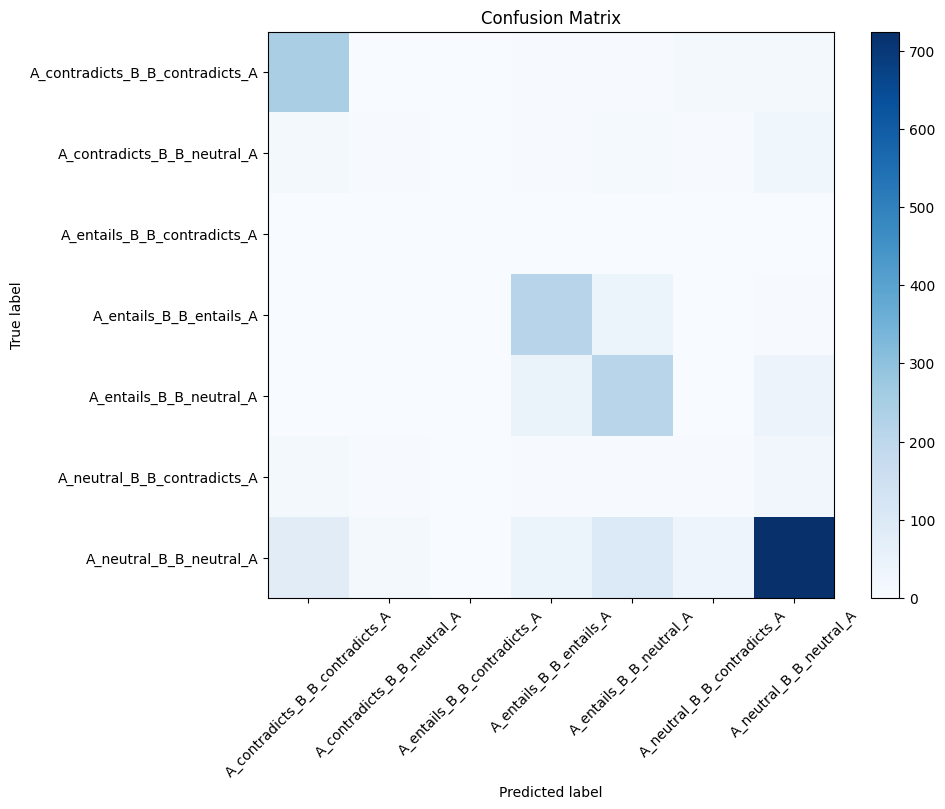

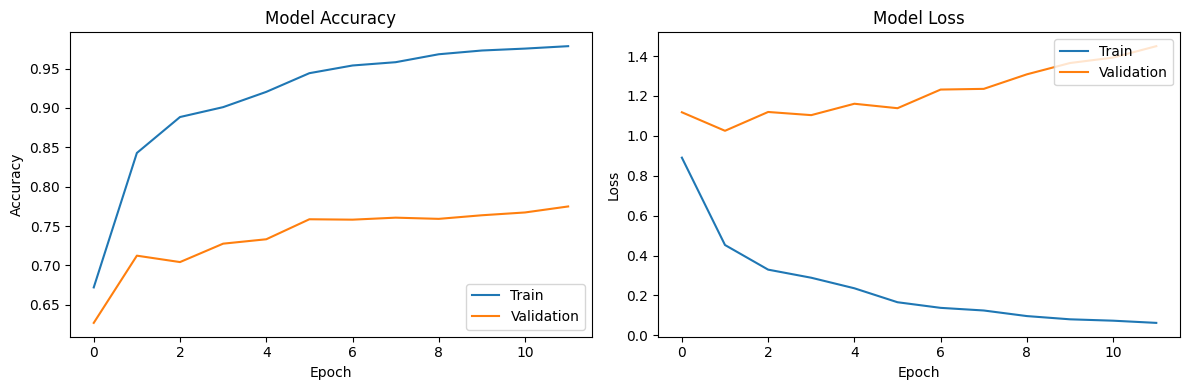

Model saved successfully.

Testing prediction function with example sentences:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step

Example 1:
Sentence A: The cat is sleeping on the couch.
Sentence B: The feline is resting on the sofa.
Predicted relationship: A_entails_B_B_neutral_A (confidence: 0.6057)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Example 2:
Sentence A: The man is walking his dog in the park.
Sentence B: A person is strolling with a canine in a green area.
Predicted relationship: A_neutral_B_B_neutral_A (confidence: 0.9996)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Example 3:
Sentence A: The book is on the table.
Sentence B: The desk has no books.
Predicted relationship: A_neutral_B_B_contradicts_A (confidence: 0.6701)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Example 4:
Sentence A: The train arrives at 5pm.
Sentence B: The plane departs at noon.
Predicted relationship: A_neutral_B_B_neutral_A (confidence: 0.5525)

Visualizing embedding similarities for example sentences...


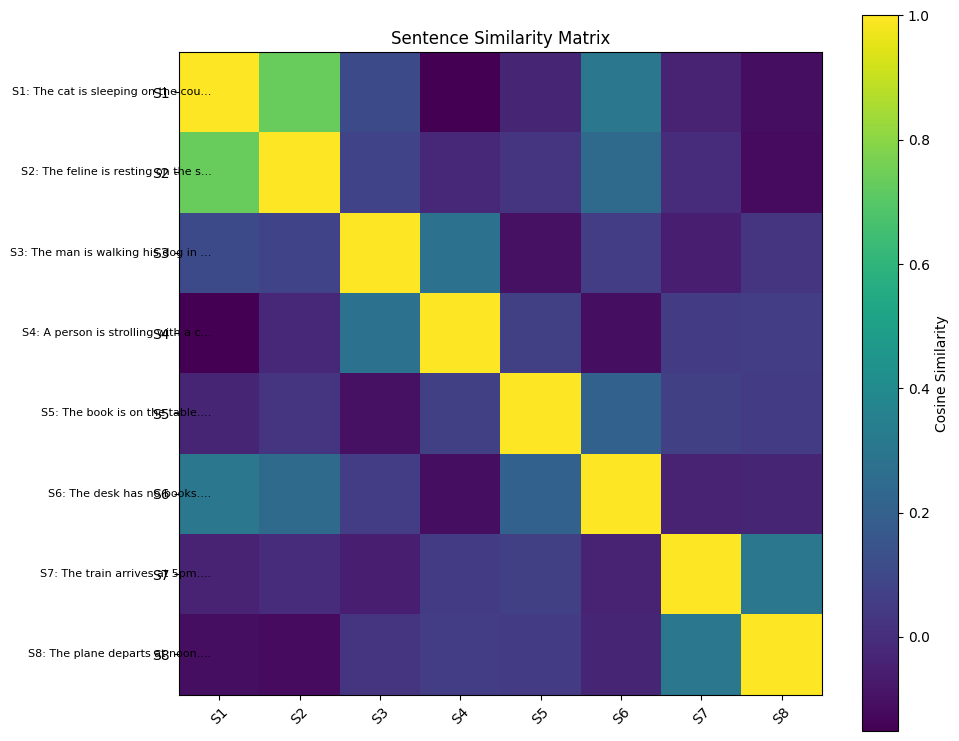

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix
import os

# First, check and install the required tf-keras package
#try:
#    import transformers
#except ImportError:
#    print("Installing required packages...")
#    !pip install -q transformers
#    !pip install -q tf-keras

#try:
#    from sentence_transformers import SentenceTransformer
#except ImportError:
#    print("Installing sentence-transformers...")
#    !pip install -q sentence-transformers

# Import these after tf-keras is installed
from imblearn.over_sampling import SMOTE
from keras_tuner import BayesianOptimization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, BatchNormalization, Subtract, Multiply
from tensorflow.keras.utils import to_categorical

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

tf.keras.backend.clear_session()

# Step 1: Load the dataset
print("Loading dataset...")
df = pd.read_csv('sentence_data.csv')
print(f"Dataset shape: {df.shape}")

# Step 2: Create combined category labels and encode
df['combined_category'] = df['entailment_AB'] + '_' + df['entailment_BA']
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['combined_category'])
num_classes = len(label_encoder.classes_)

print("\nNumber of classes:", num_classes)
print("Category mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

# Step 3: Load SBERT model and create sentence embeddings
print("\nLoading Sentence-BERT model and creating embeddings...")

# Choose an SBERT model - there are several options:
# - 'paraphrase-MiniLM-L6-v2' (faster, smaller)
# - 'all-mpnet-base-v2' (more accurate, larger)
# - 'all-distilroberta-v1' (good balance)
sbert_model_name = 'all-mpnet-base-v2'
print(f"Using SBERT model: {sbert_model_name}")

# Initialize SBERT model
sbert_model = SentenceTransformer(sbert_model_name)

# Function to encode sentences in batches (to avoid memory issues)
def batch_encode(sentences, batch_size=32):
    embeddings = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        batch_embeddings = sbert_model.encode(batch, show_progress_bar=False)
        embeddings.append(batch_embeddings)
    return np.concatenate(embeddings)

# Create sentence embeddings
print("Creating sentence embeddings with SBERT. This may take a while...")
# Check if cached embeddings exist to save time
cache_file_a = f'sbert_{sbert_model_name}_cache_A.npy'
cache_file_b = f'sbert_{sbert_model_name}_cache_B.npy'

if os.path.exists(cache_file_a) and os.path.exists(cache_file_b):
    print("Loading cached embeddings...")
    embeddings_A = np.load(cache_file_a)
    embeddings_B = np.load(cache_file_b)
else:
    print("Computing embeddings (this may take a while)...")
    embeddings_A = batch_encode(df['sentence_A'].tolist())
    embeddings_B = batch_encode(df['sentence_B'].tolist())
    # Save to cache
    np.save(cache_file_a, embeddings_A)
    np.save(cache_file_b, embeddings_B)

embedding_dim = embeddings_A.shape[1]
print(f"Embedding shape: {embeddings_A.shape}")

# Prepare labels
labels = to_categorical(df['category_encoded'], num_classes=num_classes)

# Step 4: Split data - using the embeddings
X_A_train, X_A_test, X_B_train, X_B_test, y_train, y_test = train_test_split(
    embeddings_A,
    embeddings_B,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=df['category_encoded']
)

print(f"Training set shapes: A={X_A_train.shape}, B={X_B_train.shape}, y={y_train.shape}")
print(f"Test set shapes: A={X_A_test.shape}, B={X_B_test.shape}, y={y_test.shape}")

# Get class distribution before SMOTE
y_train_classes = np.argmax(y_train, axis=1)
train_counts_before = pd.Series(y_train_classes).value_counts().sort_index()
print("\nTraining set class distribution before SMOTE:")
for i, count in enumerate(train_counts_before):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 5: Apply SMOTE to balance the dataset
print("\nApplying SMOTE...")

# SMOTE requires flat features, so we need to reshape our inputs
X_combined = np.hstack([X_A_train, X_B_train])

# Apply SMOTE to the combined feature matrix
smote = SMOTE(random_state=42)
X_combined_resampled, y_train_resampled_indices = smote.fit_resample(X_combined, y_train_classes)

# Convert the resampled indices back to one-hot encoded labels
y_train_resampled = to_categorical(y_train_resampled_indices, num_classes=num_classes)

# Split the combined feature matrix back into separate inputs
X_A_train_resampled = X_combined_resampled[:, :embedding_dim]
X_B_train_resampled = X_combined_resampled[:, embedding_dim:]

# Class distribution after SMOTE
train_counts_after = pd.Series(y_train_resampled_indices).value_counts().sort_index()
print("\nTraining set class distribution after SMOTE:")
for i, count in enumerate(train_counts_after):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 6: Define model building function for hyperparameter tuning
def build_model(hp):
    # Hyperparameters to tune
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 5e-4, 1e-3, 2e-3, 2e-4, 3e-3, 4e-3 ])
    use_batch_norm = hp.Boolean('batch_normalization')
    interaction_method = hp.Choice('interaction_method', values=['concat', 'concat_diff_mul'])
    dense_layers = hp.Int('dense_layers', min_value=2, max_value=6)
    first_dense_units = hp.Int('first_dense_units', min_value=256, max_value=1024, step=256)

    # Define inputs - we're using the embedding dimension from SBERT
    input_A = Input(shape=(embedding_dim,), name='input_A')
    input_B = Input(shape=(embedding_dim,), name='input_B')

    # Different interaction methods between the sentence embeddings
    if interaction_method == 'concat':
        # Simple concatenation
        combined = Concatenate()([input_A, input_B])
    else:
        # Concatenate with difference and element-wise multiplication
        # This captures more complex relationships between sentences
        diff = Subtract()([input_A, input_B])
        prod = Multiply()([input_A, input_B])
        combined = Concatenate()([input_A, input_B, diff, prod])

    # Add batch normalization after concatenation if selected
    if use_batch_norm:
        combined = BatchNormalization()(combined)

    # Build dynamic dense layers based on hyperparameters
    x = combined
    units = first_dense_units

    for i in range(dense_layers):
        x = Dense(units, activation='relu')(x)

        # Add batch normalization if selected
        if use_batch_norm:
            x = BatchNormalization()(x)

        x = Dropout(dropout_rate)(x)
        units = units // 2  # Halve the number of units for each layer

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[input_A, input_B], outputs=output)

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 7: Set up hyperparameter tuning
print("\nSetting up hyperparameter tuning...")


tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=30,  # Number of different hyperparameter combinations to try
    directory='hp_tuning_sbert',
    project_name='entailment_classifier_sbert'
)

# Create early stopping callback for each trial
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Step 8: Perform hyperparameter search
print("\nStarting hyperparameter search...")
tuner.search(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    epochs=30,  # Reduced for faster tuning
    batch_size=16,  # Can be larger with SBERT as we don't need to process sequences
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters:")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Use Batch Normalization: {best_hps.get('batch_normalization')}")
print(f"Interaction Method: {best_hps.get('interaction_method')}")
print(f"Number of Dense Layers: {best_hps.get('dense_layers')}")
print(f"First Dense Layer Units: {best_hps.get('first_dense_units')}")

# Step 9: Train the model with the best hyperparameters
print("\nTraining final model with best hyperparameters...")
best_model = tuner.hypermodel.build(best_hps)

# Add model checkpoint for the best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model_sbert.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Define learning rate scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the final model
history = best_model.fit(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Step 10: Evaluate final model
print("\nEvaluating final model...")
test_loss, test_accuracy = best_model.evaluate([X_A_test, X_B_test], y_test, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Step 11: Make predictions and analyze performance
print("\nGenerating predictions for test set...")
y_pred_probs = best_model.predict([X_A_test, X_B_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate per-class metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Step 12: Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Step 13: Visualize SBERT embeddings (optional)
def visualize_embeddings_similarity(sentences):
    # Encode sentences
    embeddings = sbert_model.encode(sentences)

    # Calculate similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            # Cosine similarity between the embeddings
            similarity_matrix[i, j] = np.dot(embeddings[i], embeddings[j]) / (
                np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j]))

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.xticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))], rotation=45)
    plt.yticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])

    # Add sentence texts as annotations
    for i in range(len(sentences)):
        plt.annotate(f"S{i+1}: {sentences[i][:30]}...",
                     xy=(-0.1, i),
                     xycoords='data',
                     horizontalalignment='right',
                     verticalalignment='center',
                     fontsize=8)

    plt.title('Sentence Similarity Matrix')
    plt.tight_layout()
    plt.show()

# Function for making predictions on new sentence pairs
def predict_entailment(sentence_a, sentence_b):
    # Encode the new sentences
    embed_a = sbert_model.encode([sentence_a])[0].reshape(1, -1)
    embed_b = sbert_model.encode([sentence_b])[0].reshape(1, -1)

    # Make prediction
    prediction = best_model.predict([embed_a, embed_b])[0]
    predicted_class = np.argmax(prediction)

    # Get the class name and confidence
    class_name = label_encoder.classes_[predicted_class]
    confidence = prediction[predicted_class]

    return class_name, confidence

# Save the model
best_model.save('final_entailment_model_sbert.keras')
print("Model saved successfully.")

# Demonstrate predictions with some example sentences
print("\nTesting prediction function with example sentences:")
example_pairs = [
    ("The cat is sleeping on the couch.", "The feline is resting on the sofa."),
    ("The man is walking his dog in the park.", "A person is strolling with a canine in a green area."),
    ("The book is on the table.", "The desk has no books."),
    ("The train arrives at 5pm.", "The plane departs at noon.")
]

for i, (sentence_a, sentence_b) in enumerate(example_pairs):
    result, confidence = predict_entailment(sentence_a, sentence_b)
    print(f"\nExample {i+1}:")
    print(f"Sentence A: {sentence_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Predicted relationship: {result} (confidence: {confidence:.4f})")

# Visualize embedding similarities for the example sentences
print("\nVisualizing embedding similarities for example sentences...")
example_sentences = [pair[i] for pair in example_pairs for i in range(2)]
visualize_embeddings_similarity(example_sentences)

## Added Attention logic

In [ ]:
# Cross-Attention Layer for SBERT embeddings
class CrossAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CrossAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        # input_shape is a list of two shapes: [batch_size, embedding_dim], [batch_size, embedding_dim]
        embedding_dim = input_shape[0][-1]

        # Query, Key, Value transformations
        self.query_dense = Dense(embedding_dim)
        self.key_dense = Dense(embedding_dim)
        self.value_dense = Dense(embedding_dim)

        # Output projection
        self.output_dense = Dense(embedding_dim)

        super(CrossAttention, self).build(input_shape)

    def call(self, inputs):
        # Unpack inputs
        sentence_A, sentence_B = inputs

        # Transform inputs
        queries = self.query_dense(sentence_A)  # [batch_size, embedding_dim]
        keys = self.key_dense(sentence_B)       # [batch_size, embedding_dim]
        values = self.value_dense(sentence_B)   # [batch_size, embedding_dim]

        # Reshape for attention calculation
        queries = tf.expand_dims(queries, axis=1)  # [batch_size, 1, embedding_dim]
        keys = tf.expand_dims(keys, axis=1)       # [batch_size, 1, embedding_dim]
        values = tf.expand_dims(values, axis=1)   # [batch_size, 1, embedding_dim]

        # Scaled dot-product attention
        # (batch_size, 1, embedding_dim) x (batch_size, embedding_dim, 1) = (batch_size, 1, 1)
        keys_transposed = tf.transpose(keys, [0, 2, 1])
        attention_scores = tf.matmul(queries, keys_transposed)

        # Scale attention scores
        dk = tf.cast(tf.shape(keys)[-1], tf.float32)
        attention_scores = attention_scores / tf.math.sqrt(dk)

        # Apply softmax to get attention weights
        attention_weights = tf.nn.softmax(attention_scores, axis=-1)

        # Apply attention weights to values
        context_vector = tf.matmul(attention_weights, values)

        # Remove the extra dimension and apply output transformation
        context_vector = tf.squeeze(context_vector, axis=1)
        output = self.output_dense(context_vector)

        return output, attention_weights

# Self-Attention Layer
class SelfAttention(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = units
        super(SelfAttention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W1 = self.add_weight(name="att_weight1",
                                  shape=(input_shape[-1], self.units),
                                  initializer="glorot_uniform",
                                  trainable=True)
        self.W2 = self.add_weight(name="att_weight2",
                                  shape=(self.units, 1),
                                  initializer="glorot_uniform",
                                  trainable=True)
        self.b = self.add_weight(name="att_bias",
                                 shape=(self.units,),
                                 initializer="zeros",
                                 trainable=True)
        super(SelfAttention, self).build(input_shape)

    def call(self, x):
        # x shape: (batch_size, embedding_dim)
        # Expand dimension for attention
        x_expanded = tf.expand_dims(x, 1)  # (batch_size, 1, embedding_dim)

        # Compute attention scores
        attention = tf.tanh(tf.matmul(x_expanded, self.W1) + self.b)  # (batch_size, 1, units)
        attention = tf.matmul(attention, self.W2)  # (batch_size, 1, 1)

        # Apply softmax to get attention weights
        attention_weights = tf.nn.softmax(attention, axis=1)  # (batch_size, 1, 1)

        # Apply attention weights
        context_vector = x_expanded * attention_weights  # (batch_size, 1, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)  # (batch_size, embedding_dim)

        return context_vector, attention_weights

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]

    def get_config(self):
        config = super(SelfAttention, self).get_config()
        config.update({
            'units': self.units
        })
        return config

# Updated model building function with attention mechanisms
def build_model_with_attention(hp):
    # Hyperparameters to tune
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 5e-4, 1e-3, 2e-3, 2e-4, 3e-3, 4e-3])
    use_batch_norm = hp.Boolean('batch_normalization')
    attention_type = hp.Choice('attention_type', values=['none', 'self', 'cross', 'both'])
    interaction_method = hp.Choice('interaction_method', values=['concat', 'concat_diff_mul'])
    dense_layers = hp.Int('dense_layers', min_value=2, max_value=6)
    first_dense_units = hp.Int('first_dense_units', min_value=256, max_value=1024, step=256)
    attention_units = hp.Int('attention_units', min_value=64, max_value=256, step=64)

    # Define inputs - we're using the embedding dimension from SBERT
    input_A = Input(shape=(embedding_dim,), name='input_A')
    input_B = Input(shape=(embedding_dim,), name='input_B')

    # Apply attention based on hyperparameter choice
    if attention_type == 'none':
        # No attention, use inputs directly
        processed_A = input_A
        processed_B = input_B
        attention_weights_A = None
        attention_weights_B = None

    elif attention_type == 'self':
        # Apply self-attention to each sentence embedding
        self_attention_A = SelfAttention(attention_units)
        self_attention_B = SelfAttention(attention_units)

        processed_A, attention_weights_A = self_attention_A(input_A)
        processed_B, attention_weights_B = self_attention_B(input_B)

    elif attention_type == 'cross':
        # Apply cross-attention between sentence pairs
        cross_attention = CrossAttention()

        # A attends to B, B attends to A
        processed_A, attention_weights_A = cross_attention([input_A, input_B])
        cross_attention_reverse = CrossAttention()
        processed_B, attention_weights_B = cross_attention_reverse([input_B, input_A])

    else:  # 'both'
        # First apply self-attention
        self_attention_A = SelfAttention(attention_units)
        self_attention_B = SelfAttention(attention_units)

        self_A, self_attn_weights_A = self_attention_A(input_A)
        self_B, self_attn_weights_B = self_attention_B(input_B)

        # Then apply cross-attention
        cross_attention = CrossAttention()
        cross_attention_reverse = CrossAttention()

        processed_A, cross_attn_weights_A = cross_attention([self_A, self_B])
        processed_B, cross_attn_weights_B = cross_attention_reverse([self_B, self_A])

        # For visualization purposes
        attention_weights_A = cross_attn_weights_A
        attention_weights_B = cross_attn_weights_B

    # Different interaction methods between the sentence embeddings
    if interaction_method == 'concat':
        # Simple concatenation
        combined = Concatenate()([processed_A, processed_B])
    else:
        # Concatenate with difference and element-wise multiplication
        # This captures more complex relationships between sentences
        diff = Subtract()([processed_A, processed_B])
        prod = Multiply()([processed_A, processed_B])
        combined = Concatenate()([processed_A, processed_B, diff, prod])

    # Add batch normalization after concatenation if selected
    if use_batch_norm:
        combined = BatchNormalization()(combined)

    # Build dynamic dense layers based on hyperparameters
    x = combined
    units = first_dense_units

    for i in range(dense_layers):
        x = Dense(units, activation='relu')(x)

        # Add batch normalization if selected
        if use_batch_norm:
            x = BatchNormalization()(x)

        x = Dropout(dropout_rate)(x)
        units = units // 2  # Halve the number of units for each layer

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[input_A, input_B], outputs=output)

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Replace the original tuner with the new attention-based model
print("\nSetting up hyperparameter tuning with attention mechanisms...")

attention_tuner = BayesianOptimization(
    build_model_with_attention,
    objective='val_accuracy',
    max_trials=15,  # Reduced trials to save time
    directory='hp_tuning_sbert_with_attention',
    project_name='entailment_classifier_sbert_attention'
)

# Example of how to modify the prediction function to visualize attention
def predict_with_attention(sentence_a, sentence_b, attention_model):
    # Encode the new sentences
    embed_a = sbert_model.encode([sentence_a])[0].reshape(1, -1)
    embed_b = sbert_model.encode([sentence_b])[0].reshape(1, -1)

    # Create a separate model to extract attention weights
    # This would need to be customized based on your final model architecture
    attention_layer = attention_model.get_layer('cross_attention')
    attention_extraction_model = tf.keras.Model(
        inputs=attention_model.inputs,
        outputs=[attention_model.output, attention_layer.output[1]]
    )

    # Make prediction and get attention weights
    prediction, attention_weights = attention_extraction_model.predict([embed_a, embed_b])
    predicted_class = np.argmax(prediction[0])

    # Get the class name and confidence
    class_name = label_encoder.classes_[predicted_class]
    confidence = prediction[0][predicted_class]

    # Visualize attention weights (simplified for 1D attention)
    plt.figure(figsize=(10, 2))
    plt.bar(range(len(sentence_a.split())), attention_weights[0][0])
    plt.xticks(range(len(sentence_a.split())), sentence_a.split(), rotation=45)
    plt.title('Attention weights')
    plt.tight_layout()
    plt.show()

    return class_name, confidence, attention_weights


Setting up hyperparameter tuning with attention mechanisms...


## SBERT with attention

# New Section

GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]
Loading dataset...
Dataset shape: (9840, 5)

Number of classes: 7
Category mapping:
0: A_contradicts_B_B_contradicts_A
1: A_contradicts_B_B_neutral_A
2: A_entails_B_B_contradicts_A
3: A_entails_B_B_entails_A
4: A_entails_B_B_neutral_A
5: A_neutral_B_B_contradicts_A
6: A_neutral_B_B_neutral_A

Loading Sentence-BERT model and creating embeddings...
Using SBERT model: all-mpnet-base-v2
Creating sentence embeddings with SBERT. This may take a while...
Loading cached embeddings...
Embedding shape: (9840, 768)
Training set shapes: A=(7872, 768), B=(7872, 768), y=(7872, 7)
Test set shapes: A=(1968, 768), B=(1968, 768), y=(1968, 7)

Training set class distribution before SMOTE:
0 (A_contradicts_B_B_contradicts_A): 1139
1 (A_contradicts_B_B_neutral_A): 262
2 (A_entails_B_B_contradicts_A): 6
3 (A_entails_B_B_entails_A): 1040
4 (A_entails_B_B_neutral

2025-04-09 23:32:40.899409: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_1', 4 bytes spill stores, 4 bytes spill loads




Epoch 1: val_accuracy improved from -inf to 0.55640, saving model to best_model_sbert.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.5623 - loss: 1.2063 - val_accuracy: 0.5564 - val_loss: 1.3555 - learning_rate: 0.0040
Epoch 2/50
866/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8271 - loss: 0.4863
Epoch 2: val_accuracy improved from 0.55640 to 0.71748, saving model to best_model_sbert.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8273 - loss: 0.4860 - val_accuracy: 0.7175 - val_loss: 1.0183 - learning_rate: 0.0040
Epoch 3/50
871/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8802 - loss: 0.3379
Epoch 3: val_accuracy improved from 0.71748 to 0.73679, saving model to best_model_sbert.keras
874/874 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8802 - loss: 0.3379 - val_accuracy: 0.7368 - val_loss: 1.0288 - learning_rate: 0.0040
Epoch 4/50
865/874 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9104 - loss: 0.2603
Epoch 4: val_accuracy did not impr

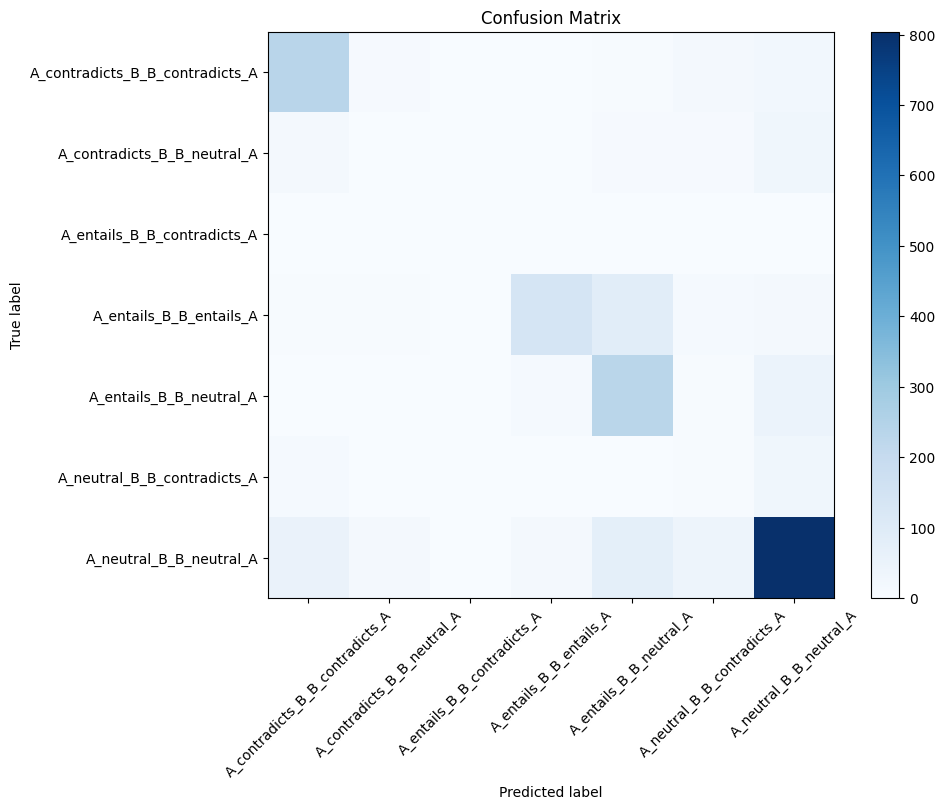

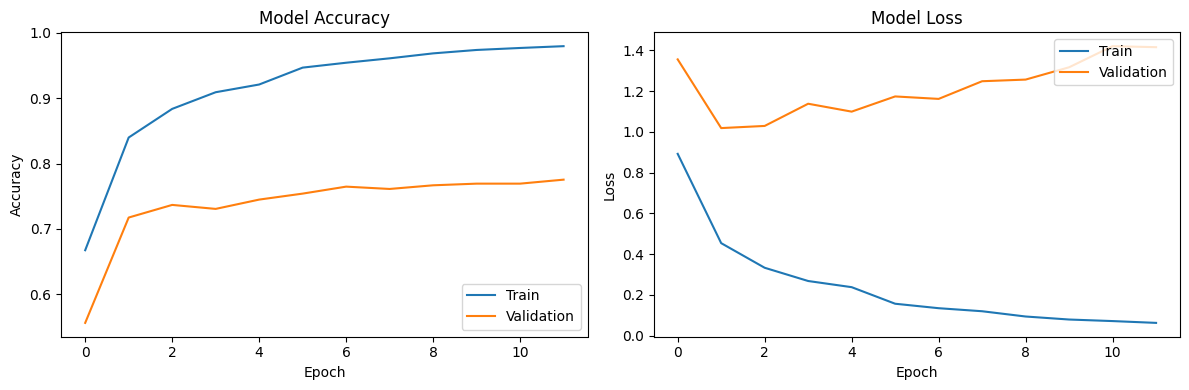

Model saved successfully.

Testing prediction function with example sentences:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step

Example 1:
Sentence A: The cat is sleeping on the couch.
Sentence B: The feline is resting on the sofa.
Predicted relationship: A_contradicts_B_B_contradicts_A (confidence: 0.9373)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Example 2:
Sentence A: The man is walking his dog in the park.
Sentence B: A person is strolling with a canine in a green area.
Predicted relationship: A_neutral_B_B_neutral_A (confidence: 0.9198)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

Example 3:
Sentence A: The book is on the table.
Sentence B: The desk has no books.
Predicted relationship: A_neutral_B_B_contradicts_A (confidence: 0.9925)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Example 4:
Sentence A: The train arrives at 5pm.
Sentence B: The plane departs at noon.
Predicted relationship: A_neutral_B_B_neutral_A (confidence: 0.5988)

Visualizing embedding similarities for example sentences...


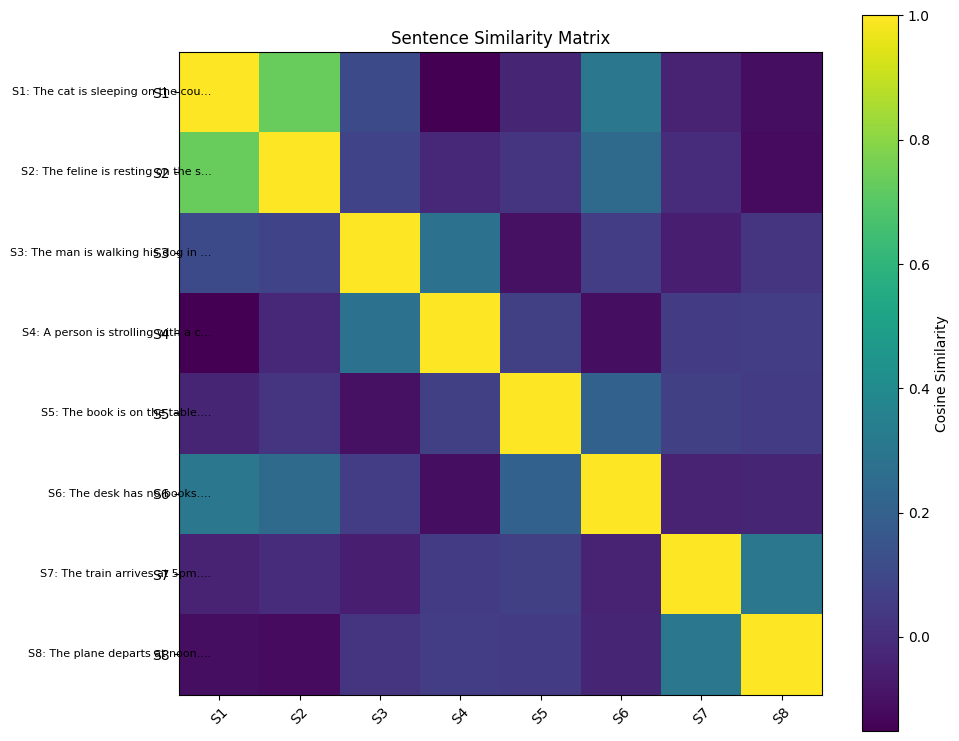

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
from sklearn.metrics import classification_report, confusion_matrix
import os

# First, check and install the required tf-keras package
#try:
#    import transformers
#except ImportError:
#    print("Installing required packages...")
#    !pip install -q transformers
#    !pip install -q tf-keras

#try:
#    from sentence_transformers import SentenceTransformer
#except ImportError:
#    print("Installing sentence-transformers...")
#    !pip install -q sentence-transformers

# Import these after tf-keras is installed
from imblearn.over_sampling import SMOTE
from keras_tuner import BayesianOptimization
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, BatchNormalization, Subtract, Multiply
from tensorflow.keras.utils import to_categorical

# Check if GPU is available
print("GPU Available: ", tf.config.list_physical_devices('GPU'))

tf.keras.backend.clear_session()

# Step 1: Load the dataset
print("Loading dataset...")
df = pd.read_csv('sentence_data.csv')
print(f"Dataset shape: {df.shape}")

# Step 2: Create combined category labels and encode
df['combined_category'] = df['entailment_AB'] + '_' + df['entailment_BA']
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['combined_category'])
num_classes = len(label_encoder.classes_)

print("\nNumber of classes:", num_classes)
print("Category mapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

# Step 3: Load SBERT model and create sentence embeddings
print("\nLoading Sentence-BERT model and creating embeddings...")

# Choose an SBERT model - there are several options:
# - 'paraphrase-MiniLM-L6-v2' (faster, smaller)
# - 'all-mpnet-base-v2' (more accurate, larger)
# - 'all-distilroberta-v1' (good balance)
sbert_model_name = 'all-mpnet-base-v2'
print(f"Using SBERT model: {sbert_model_name}")

# Initialize SBERT model
sbert_model = SentenceTransformer(sbert_model_name)

# Function to encode sentences in batches (to avoid memory issues)
def batch_encode(sentences, batch_size=32):
    embeddings = []
    for i in range(0, len(sentences), batch_size):
        batch = sentences[i:i+batch_size]
        batch_embeddings = sbert_model.encode(batch, show_progress_bar=False)
        embeddings.append(batch_embeddings)
    return np.concatenate(embeddings)

# Create sentence embeddings
print("Creating sentence embeddings with SBERT. This may take a while...")
# Check if cached embeddings exist to save time
cache_file_a = f'sbert_{sbert_model_name}_cache_A.npy'
cache_file_b = f'sbert_{sbert_model_name}_cache_B.npy'

if os.path.exists(cache_file_a) and os.path.exists(cache_file_b):
    print("Loading cached embeddings...")
    embeddings_A = np.load(cache_file_a)
    embeddings_B = np.load(cache_file_b)
else:
    print("Computing embeddings (this may take a while)...")
    embeddings_A = batch_encode(df['sentence_A'].tolist())
    embeddings_B = batch_encode(df['sentence_B'].tolist())
    # Save to cache
    np.save(cache_file_a, embeddings_A)
    np.save(cache_file_b, embeddings_B)

embedding_dim = embeddings_A.shape[1]
print(f"Embedding shape: {embeddings_A.shape}")

# Prepare labels
labels = to_categorical(df['category_encoded'], num_classes=num_classes)

# Step 4: Split data - using the embeddings
X_A_train, X_A_test, X_B_train, X_B_test, y_train, y_test = train_test_split(
    embeddings_A,
    embeddings_B,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=df['category_encoded']
)

print(f"Training set shapes: A={X_A_train.shape}, B={X_B_train.shape}, y={y_train.shape}")
print(f"Test set shapes: A={X_A_test.shape}, B={X_B_test.shape}, y={y_test.shape}")

# Get class distribution before SMOTE
y_train_classes = np.argmax(y_train, axis=1)
train_counts_before = pd.Series(y_train_classes).value_counts().sort_index()
print("\nTraining set class distribution before SMOTE:")
for i, count in enumerate(train_counts_before):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 5: Apply SMOTE to balance the dataset
print("\nApplying SMOTE...")

# SMOTE requires flat features, so we need to reshape our inputs
X_combined = np.hstack([X_A_train, X_B_train])

# Apply SMOTE to the combined feature matrix
smote = SMOTE(random_state=42)
X_combined_resampled, y_train_resampled_indices = smote.fit_resample(X_combined, y_train_classes)

# Convert the resampled indices back to one-hot encoded labels
y_train_resampled = to_categorical(y_train_resampled_indices, num_classes=num_classes)

# Split the combined feature matrix back into separate inputs
X_A_train_resampled = X_combined_resampled[:, :embedding_dim]
X_B_train_resampled = X_combined_resampled[:, embedding_dim:]

# Class distribution after SMOTE
train_counts_after = pd.Series(y_train_resampled_indices).value_counts().sort_index()
print("\nTraining set class distribution after SMOTE:")
for i, count in enumerate(train_counts_after):
    print(f"{i} ({label_encoder.classes_[i]}): {count}")

# Step 6: Define model building function for hyperparameter tuning
def build_model(hp):
    # Hyperparameters to tune
    dropout_rate = hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 5e-4, 1e-3, 2e-3, 2e-4, 3e-3, 4e-3 ])
    use_batch_norm = hp.Boolean('batch_normalization')
    interaction_method = hp.Choice('interaction_method', values=['concat', 'concat_diff_mul'])
    dense_layers = hp.Int('dense_layers', min_value=2, max_value=6)
    first_dense_units = hp.Int('first_dense_units', min_value=256, max_value=1024, step=256)

    # Define inputs - we're using the embedding dimension from SBERT
    input_A = Input(shape=(embedding_dim,), name='input_A')
    input_B = Input(shape=(embedding_dim,), name='input_B')

    # Different interaction methods between the sentence embeddings
    if interaction_method == 'concat':
        # Simple concatenation
        combined = Concatenate()([input_A, input_B])
    else:
        # Concatenate with difference and element-wise multiplication
        # This captures more complex relationships between sentences
        diff = Subtract()([input_A, input_B])
        prod = Multiply()([input_A, input_B])
        combined = Concatenate()([input_A, input_B, diff, prod])

    # Add batch normalization after concatenation if selected
    if use_batch_norm:
        combined = BatchNormalization()(combined)

    # Build dynamic dense layers based on hyperparameters
    x = combined
    units = first_dense_units

    for i in range(dense_layers):
        x = Dense(units, activation='relu')(x)

        # Add batch normalization if selected
        if use_batch_norm:
            x = BatchNormalization()(x)

        x = Dropout(dropout_rate)(x)
        units = units // 2  # Halve the number of units for each layer

    # Output layer
    output = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=[input_A, input_B], outputs=output)

    # Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Step 7: Set up hyperparameter tuning
print("\nSetting up hyperparameter tuning...")


tuner = BayesianOptimization(
    build_model_with_attention,
    objective='val_accuracy',
    max_trials=30,  # Number of different hyperparameter combinations to try
    directory='hp_tuning_sbert',
    project_name='entailment_classifier_sbert'
)

# Create early stopping callback for each trial
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Step 8: Perform hyperparameter search
print("\nStarting hyperparameter search...")
tuner.search(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    epochs=30,  # Reduced for faster tuning
    batch_size=16,  # Can be larger with SBERT as we don't need to process sequences
    callbacks=[early_stopping]
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("\nBest hyperparameters:")
print(f"Dropout Rate: {best_hps.get('dropout_rate')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")
print(f"Use Batch Normalization: {best_hps.get('batch_normalization')}")
print(f"Interaction Method: {best_hps.get('interaction_method')}")
print(f"Number of Dense Layers: {best_hps.get('dense_layers')}")
print(f"First Dense Layer Units: {best_hps.get('first_dense_units')}")

# Step 9: Train the model with the best hyperparameters
print("\nTraining final model with best hyperparameters...")
best_model = tuner.hypermodel.build(best_hps)

# Add model checkpoint for the best model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model_sbert.keras',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Define learning rate scheduler
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the final model
history = best_model.fit(
    [X_A_train_resampled, X_B_train_resampled],
    y_train_resampled,
    validation_data=([X_A_test, X_B_test], y_test),
    batch_size=32,
    epochs=50,
    callbacks=[early_stopping, model_checkpoint, reduce_lr],
    verbose=1
)

# Step 10: Evaluate final model
print("\nEvaluating final model...")
test_loss, test_accuracy = best_model.evaluate([X_A_test, X_B_test], y_test, verbose=1)
print(f"Test accuracy: {test_accuracy:.4f}")

# Step 11: Make predictions and analyze performance
print("\nGenerating predictions for test set...")
y_pred_probs = best_model.predict([X_A_test, X_B_test])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate per-class metrics
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Step 12: Visualize training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Step 13: Visualize SBERT embeddings (optional)
def visualize_embeddings_similarity(sentences):
    # Encode sentences
    embeddings = sbert_model.encode(sentences)

    # Calculate similarity matrix
    similarity_matrix = np.zeros((len(sentences), len(sentences)))
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            # Cosine similarity between the embeddings
            similarity_matrix[i, j] = np.dot(embeddings[i], embeddings[j]) / (
                np.linalg.norm(embeddings[i]) * np.linalg.norm(embeddings[j]))

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    plt.imshow(similarity_matrix, cmap='viridis', interpolation='nearest')
    plt.colorbar(label='Cosine Similarity')
    plt.xticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))], rotation=45)
    plt.yticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])

    # Add sentence texts as annotations
    for i in range(len(sentences)):
        plt.annotate(f"S{i+1}: {sentences[i][:30]}...",
                     xy=(-0.1, i),
                     xycoords='data',
                     horizontalalignment='right',
                     verticalalignment='center',
                     fontsize=8)

    plt.title('Sentence Similarity Matrix')
    plt.tight_layout()
    plt.show()

# Function for making predictions on new sentence pairs
def predict_entailment(sentence_a, sentence_b):
    # Encode the new sentences
    embed_a = sbert_model.encode([sentence_a])[0].reshape(1, -1)
    embed_b = sbert_model.encode([sentence_b])[0].reshape(1, -1)

    # Make prediction
    prediction = best_model.predict([embed_a, embed_b])[0]
    predicted_class = np.argmax(prediction)

    # Get the class name and confidence
    class_name = label_encoder.classes_[predicted_class]
    confidence = prediction[predicted_class]

    return class_name, confidence

# Save the model
best_model.save('final_entailment_model_sbert.keras')
print("Model saved successfully.")

# Demonstrate predictions with some example sentences
print("\nTesting prediction function with example sentences:")
example_pairs = [
    ("The cat is sleeping on the couch.", "The feline is resting on the sofa."),
    ("The man is walking his dog in the park.", "A person is strolling with a canine in a green area."),
    ("The book is on the table.", "The desk has no books."),
    ("The train arrives at 5pm.", "The plane departs at noon.")
]

for i, (sentence_a, sentence_b) in enumerate(example_pairs):
    result, confidence = predict_entailment(sentence_a, sentence_b)
    print(f"\nExample {i+1}:")
    print(f"Sentence A: {sentence_a}")
    print(f"Sentence B: {sentence_b}")
    print(f"Predicted relationship: {result} (confidence: {confidence:.4f})")

# Visualize embedding similarities for the example sentences
print("\nVisualizing embedding similarities for example sentences...")
example_sentences = [pair[i] for pair in example_pairs for i in range(2)]
visualize_embeddings_similarity(example_sentences)

# CNN


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
df = pd.read_csv('sentence_data.csv')

# Create combined labels
df['combined_category'] = df['entailment_AB'] + '_' + df['entailment_BA']
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['combined_category'])
num_classes = len(label_encoder.classes_)

print("Classes:", label_encoder.classes_)

# Combine sentence A and B with special separator
texts = (df['sentence_A'] + " [SEP] " + df['sentence_B']).tolist()
labels = tf.keras.utils.to_categorical(df['category_encoded'], num_classes=num_classes)

# Tokenize sentences
max_vocab_size = 20000
max_seq_len = 100

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="[OOV]")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=max_seq_len, padding='post', truncating='post')

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    padded_sequences, labels, test_size=0.2, random_state=42, stratify=df['category_encoded']
)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, Layer, Multiply

# Custom Attention Layer
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1), initializer='normal', trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(inputs, self.W))
        alpha = tf.keras.backend.softmax(e, axis=1)
        attended = inputs * alpha
        return tf.keras.backend.sum(attended, axis=1)

# Build model
def build_cnn_attention_model():
    inputs = Input(shape=(max_seq_len,))
    x = Embedding(input_dim=max_vocab_size, output_dim=128)(inputs)
    x = Conv1D(256, kernel_size=5, activation='relu')(x)
    x = Conv1D(128, kernel_size=3, activation='relu')(x)
    x = AttentionLayer()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

cnn_attention_model = build_cnn_attention_model()
cnn_attention_model.summary()
history_cnn = cnn_attention_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
    verbose=1
)
# Evaluate
test_loss, test_accuracy = cnn_attention_model.evaluate(X_test, y_test, verbose=1)
print(f"CNN+Attention Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred_probs = cnn_attention_model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report for CNN+Attention:")
print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN+Attention Confusion Matrix')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sentence_data.csv'